In [1]:
from google.colab import files
uploaded = files.upload()

Saving labels.csv to labels.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Load the dataset
df = pd.read_csv("labels.csv")

In [3]:
df.head(5) #display first 5 rows

,ID,Channel,StartTime,EndTime
0,id_1,channel_12,2004-12-01T20:42:15.429Z,NaN
1,id_1,channel_13,2004-12-01T20:42:15.429Z,2004-12-08T22:55:45.429Z
2,id_1,channel_14,2004-12-01T20:43:45.429Z,2004-12-02T02:57:15.429Z
3,id_1,channel_15,2004-12-01T20:45:00.429Z,2004-12-02T02:58:45.429Z
4,id_1,channel_16,2004-12-01T20:43:45.429Z,2004-12-16T16:52:30.429Z


In [4]:
df.tail(5) #display last 5 rows

,ID,Channel,StartTime,EndTime
3584,id_200,channel_52,2000-10-10T00:50:40.701Z,2000-10-11T04:56:40.701Z
3585,id_200,channel_57,2000-10-10T00:50:05.817Z,2000-10-12T12:00:05.817Z
3586,id_200,channel_58,2000-10-10T01:03:35.817Z,2000-10-13T00:02:05.817Z
3587,id_200,channel_59,2000-10-10T00:46:35.817Z,2000-10-12T09:16:05.817Z
3588,id_200,channel_60,2000-10-10T01:12:05.817Z,2000-10-12T12:44:35.817Z


In [5]:
# Get number of rows and columns
num_rows, num_cols = df.shape

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object','category']).columns


# Print results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")
print(f"Number of numeric columns: {len(numeric_cols)}")
print(f"Number of categorical columns: {len(categorical_cols)}")

Number of rows: 3589
Number of columns: 4
Number of numeric columns: 0
Number of categorical columns: 4


Summary Table
Expression	What It Does
df.isnull()	Returns a boolean mask for missing values
df.isnull().sum()	Counts missing values in each column
df.isnull().sum().sum()	Totals all missing values in the DataFrame

In [6]:
# Calculate the number of missing values in each column
missing_values_per_column = df.isnull().sum()

# Calculate the total number of missing values in the dataset
total_missing_values = missing_values_per_column.sum()

# Display the number of missing values per column
print("Missing values per column:")
print(missing_values_per_column)

# Display the total number of missing values in the dataset
print("\nTotal number of missing values in the dataset:")
print(total_missing_values)

Missing values per column:
ID            7
Channel      16
StartTime    42
EndTime      41
dtype: int64

Total number of missing values in the dataset:
106


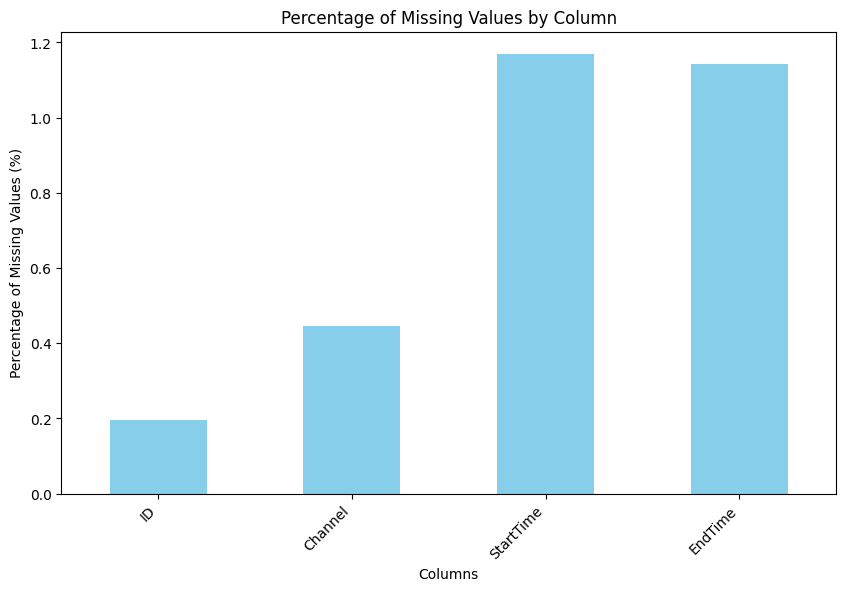

In [7]:

# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Create a bar chart of the missing values
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

updated data

In [8]:
# Remove all rows with missing values
df_clean = df.dropna()

# Save the cleaned dataset to a new CSV file
df_clean.to_csv('cleaned_anomaly_data.csv', index=False)

# Display the first few rows of the cleaned dataset to verify
print(df_clean.head())

     ID     Channel                 StartTime                   EndTime
1  id_1  channel_13  2004-12-01T20:42:15.429Z  2004-12-08T22:55:45.429Z
2  id_1  channel_14  2004-12-01T20:43:45.429Z  2004-12-02T02:57:15.429Z
3  id_1  channel_15  2004-12-01T20:45:00.429Z  2004-12-02T02:58:45.429Z
4  id_1  channel_16  2004-12-01T20:43:45.429Z  2004-12-16T16:52:30.429Z
5  id_1  channel_17  2004-12-01T20:45:00.429Z  2004-12-08T22:55:45.429Z


In [9]:
# Get number of rows and columns
num_rows, num_cols = df.shape

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object','category']).columns


# Print results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")
print(f"Number of numeric columns: {len(numeric_cols)}")
print(f"Number of categorical columns: {len(categorical_cols)}")

Number of rows: 3589
Number of columns: 4
Number of numeric columns: 0
Number of categorical columns: 4


In [10]:
df= pd.read_csv('/content/cleaned_anomaly_data.csv')
missing_values = df.isnull().sum()

# Calculate the total number of missing values
total_missing_values = missing_values.sum()

print("Total number of missing values in the dataset:", total_missing_values)

Total number of missing values in the dataset: 0


df.describe() generates a summary of statistics for the DataFrame df.

By default, it only summarizes numeric columns (like mean, std, min, max).

But with include="all", it forces pandas to include all column types:

Numeric columns → get stats like count, mean, std, min, 25%, 50%, 75%, max.

Categorical (object/string) columns → get count, unique, top, freq.

unique = number of unique values.

top = most frequent value.

freq = how many times that top value appears.

Boolean columns → similar to categorical.

Datetime columns → show count, min, max (no mean/std because it’s not meaningful).

This summary is very useful for quickly understanding the dataset.

In [11]:
import pandas as pd

# Generate statistical summary
stat_summary = df.describe(include="all")

# Display the summary
print(stat_summary)

           ID     Channel                 StartTime                   EndTime
count    3492        3492                      3492                      3492
unique    200          58                      1505                      1601
top     id_17  channel_44  2001-06-27T08:13:45.576Z  2001-05-31T11:27:18.579Z
freq      177         206                        29                        29


This program is doing feature engineering on datetime columns in a pandas DataFrame.
If StartTime and EndTime were strings (e.g., "2004-12-01 20:42:15"), they are converted into datetime objects.

This makes it easier to extract date/time parts (like year, month, hour) and perform calculations.
Extracting features from StartTime
year, month, day → numerical values.

day_name() → gives weekday name (like "Monday", "Tuesday").

hour, minute → useful for analyzing activity patterns during the day.

Subtracting two datetimes gives a timedelta object.

.dt.total_seconds() → total time difference in seconds.

Dividing by 3600 converts seconds into hours.

This tells you how long each event lasted.

In [12]:
# Convert to datetime
df['StartTime'] = pd.to_datetime(df['StartTime'])
df['EndTime'] = pd.to_datetime(df['EndTime'])

# Extract features from StartTime
df['start_year'] = df['StartTime'].dt.year
df['start_month'] = df['StartTime'].dt.month
df['start_day'] = df['StartTime'].dt.day
df['start_weekday'] = df['StartTime'].dt.day_name()
df['start_hour'] = df['StartTime'].dt.hour
df['start_minute'] = df['StartTime'].dt.minute

# Extract features from EndTime
df['end_year'] = df['EndTime'].dt.year
df['end_month'] = df['EndTime'].dt.month
df['end_day'] = df['EndTime'].dt.day
df['end_weekday'] = df['EndTime'].dt.day_name()
df['end_hour'] = df['EndTime'].dt.hour
df['end_minute'] = df['EndTime'].dt.minute

# Duration in hours
df['duration_hours'] = (df['EndTime'] - df['StartTime']).dt.total_seconds() / 3600

print(df.head())

     ID     Channel                        StartTime  \
0  id_1  channel_13 2004-12-01 20:42:15.429000+00:00   
1  id_1  channel_14 2004-12-01 20:43:45.429000+00:00   
2  id_1  channel_15 2004-12-01 20:45:00.429000+00:00   
3  id_1  channel_16 2004-12-01 20:43:45.429000+00:00   
4  id_1  channel_17 2004-12-01 20:45:00.429000+00:00   

                           EndTime  start_year  start_month  start_day  \
0 2004-12-08 22:55:45.429000+00:00        2004           12          1   
1 2004-12-02 02:57:15.429000+00:00        2004           12          1   
2 2004-12-02 02:58:45.429000+00:00        2004           12          1   
3 2004-12-16 16:52:30.429000+00:00        2004           12          1   
4 2004-12-08 22:55:45.429000+00:00        2004           12          1   

  start_weekday  start_hour  start_minute  end_year  end_month  end_day  \
0     Wednesday          20            42      2004         12        8   
1     Wednesday          20            43      2004         12      

Such feature engineering is especially useful for:

Time-series analysis

Predictive modeling

Usage/activity pattern analysis
visual workflow diagram (showing raw datetime → feature extraction → duration)

In [13]:
df.describe()

,start_year,start_month,start_day,start_hour,start_minute,end_year,end_month,end_day,end_hour,end_minute,duration_hours
count,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000,3492.000000
mean,2005.992841,6.665521,17.406930,11.886312,28.365693,2006.002291,6.620561,17.291523,11.559565,27.676976,47.050224
std,4.025443,3.391622,8.451977,7.358361,16.977381,4.021853,3.377866,8.591417,7.540868,18.525893,116.271638
min,2000.000000,1.000000,1.000000,0.000000,0.000000,2000.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2002.000000,4.000000,10.000000,5.000000,14.000000,2002.000000,4.000000,10.000000,5.000000,11.000000,0.241667
50%,2006.000000,6.000000,18.000000,12.000000,28.000000,2006.000000,6.000000,18.000000,12.000000,30.000000,3.300000
75%,2009.000000,10.000000,25.000000,19.000000,43.000000,2009.000000,10.000000,25.000000,18.000000,43.000000,36.806250
max,2013.000000,12.000000,31.000000,23.000000,59.000000,2013.000000,12.000000,31.000000,23.000000,59.000000,966.986665


df['duration_hours'] → selects the column containing your calculated durations.

bins=30 → splits the values into 30 intervals (like grouping durations into buckets).

kde=True → overlays a Kernel Density Estimate curve, which smooths the distribution to show trends.

color="skyblue" → makes the bars light blue.

This shows how many events have certain duration ranges.

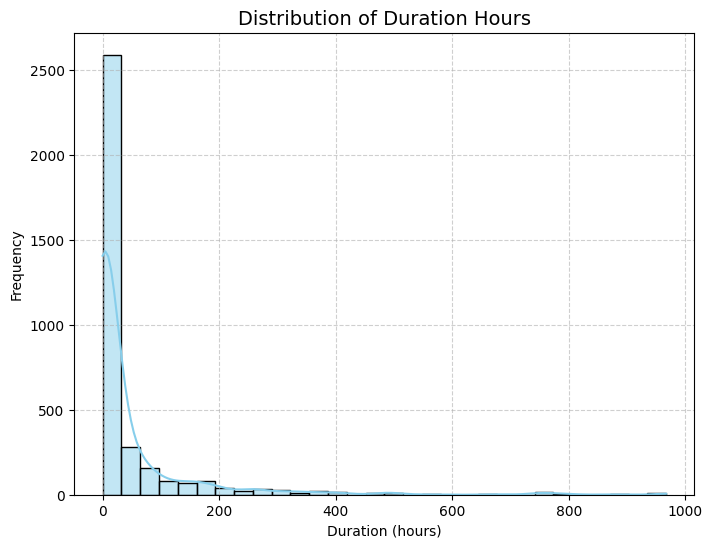

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your dataframe
# Example: df = pd.read_csv("your_file.csv")

plt.figure(figsize=(8,6))

# Histogram + KDE
sns.histplot(df['duration_hours'], bins=30, kde=True, color="skyblue")

plt.title("Distribution of Duration Hours", fontsize=14)
plt.xlabel("Duration (hours)")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

How your duration_hours values are distributed (e.g., most events are 10–20 hours long, very few are above 100 hours).

Whether the distribution is normal, skewed, or has outliers.

KDE curve helps to see the smooth probability density instead of just bars.

You’re building feature buckets for preprocessing: numeric → scale, categorical → encode, ordinal → ordered encode.

Excluding ID avoids leaking meaningless identifiers into the model.

Make it more robust by using include='number' and adding 'category' to categorical, and by handling datetime columns via engineered features (e.g., duration_hours).


In [15]:
# Separate features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Remove ID from categorical if it's just an identifier
if 'ID' in categorical_features:
    categorical_features.remove('ID')

# For this dataset, no ordinal features are predefined,
# but you can manually assign if some columns have order
ordinal_features = []

# Print results
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)
print("Ordinal Features:", ordinal_features)

Numerical Features: ['duration_hours']
Categorical Features: ['Channel', 'start_weekday', 'end_weekday']
Ordinal Features: []


Simple examples---> catagorical feature:

Size: Small < Medium < Large

Education: High School < Bachelor < Master < PhD

Satisfaction (Likert): Strongly Disagree < … < Strongly Agree

Severity: Low < Medium < High < Critical

Quality grade: A < B < C < D

/tmp/ipython-input-2959899280.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=cat)


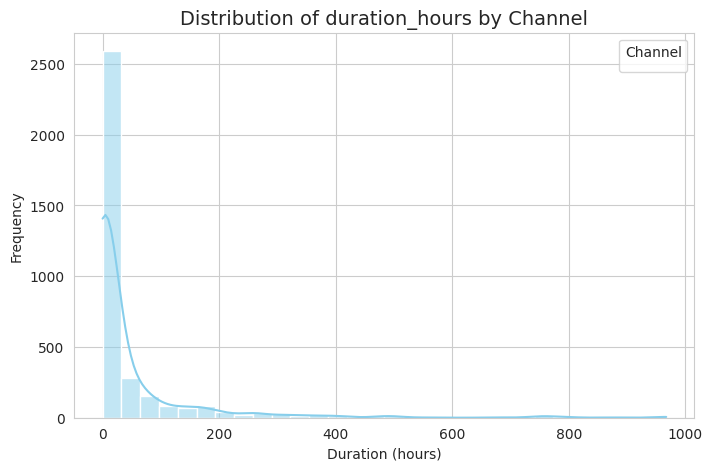

/tmp/ipython-input-2959899280.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=cat)


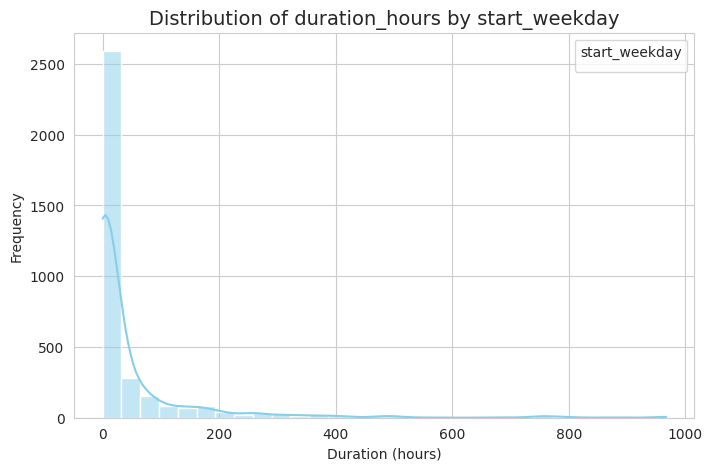

/tmp/ipython-input-2959899280.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=cat)


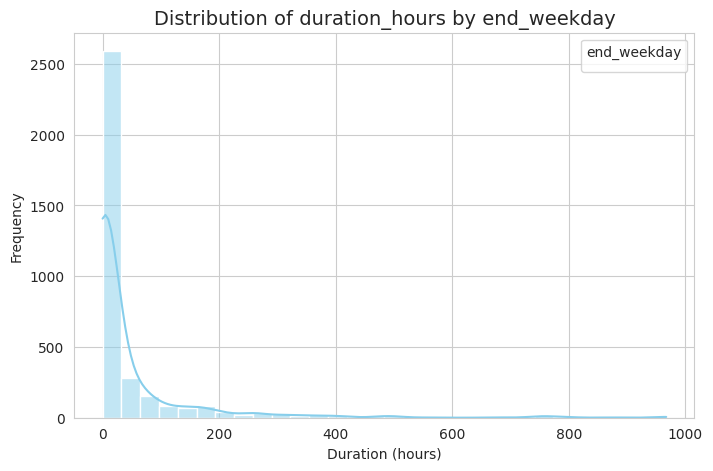

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numeric and categorical features
numerical_feature = "duration_hours"
categorical_features = ['Channel', 'start_weekday', 'end_weekday']

# Set style globally
sns.set_style("whitegrid")

for cat in categorical_features:
    plt.figure(figsize=(8,5))
    sns.histplot(
        data=df,
        x=numerical_feature,
        bins=30,
        multiple="stack",
        kde=True,
        color="skyblue"
    )
    plt.title(f"Distribution of {numerical_feature} by {cat}", fontsize=14)
    plt.xlabel("Duration (hours)")
    plt.ylabel("Frequency")
    plt.legend(title=cat)
    plt.show()



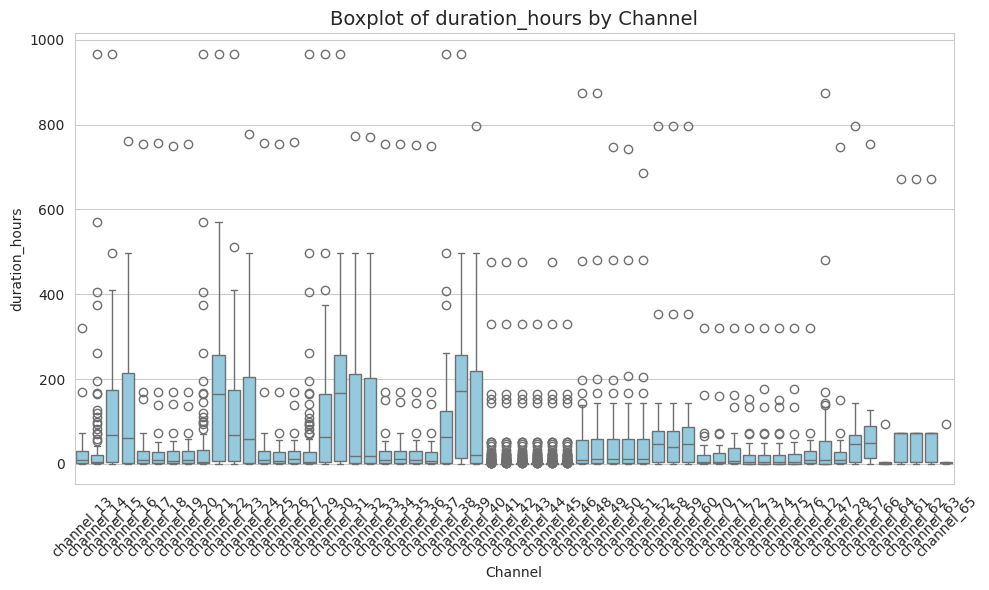

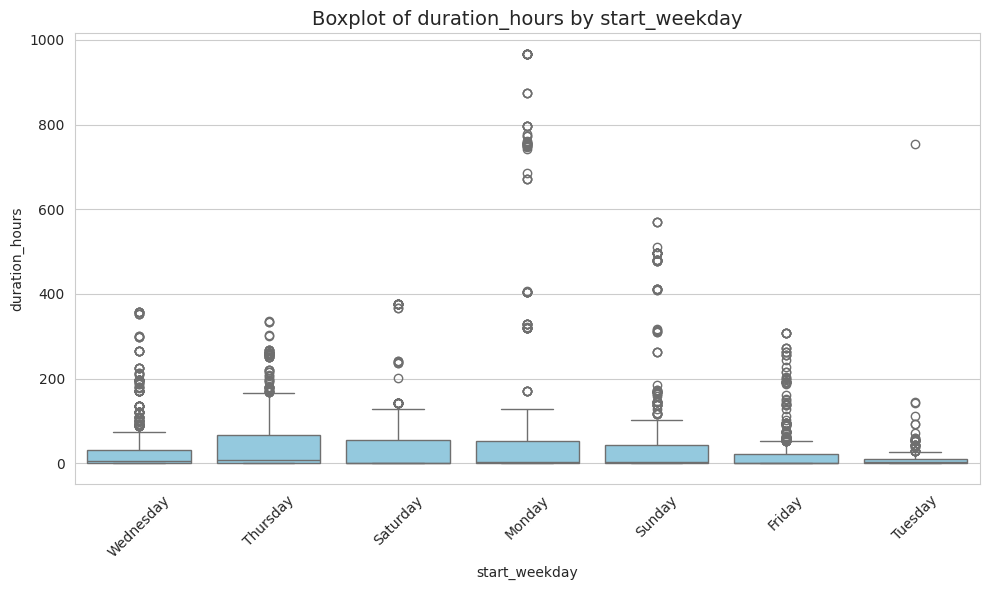

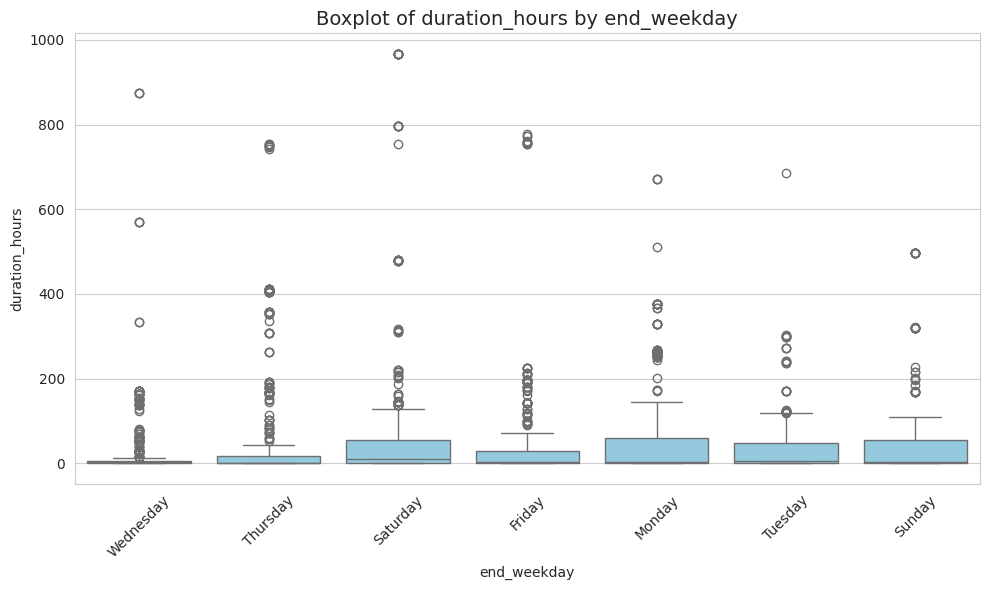

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

# Categorical features
categorical_features = ['Channel', 'start_weekday', 'end_weekday']

# Plot boxplots with skyblue color
for cat in categorical_features:
    for num in numeric_features:
        plt.figure(figsize=(10,6))
        sns.boxplot(x=cat, y=num, data=df, color="skyblue")  # single color
        plt.title(f'Boxplot of {num} by {cat}', fontsize=14)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()



Groups the dataset by the categorical column (say Channel).

Calculates three statistics of duration_hours for each group:

median = middle value (robust to outliers).

max = maximum duration.

min = minimum duration.

reset_index() makes it a new DataFrame for plotting.
For each group (category), it plots:

Purple line with circles → median.

Red line with x-marks → max.

Green line with stars → min.
What the output shows:

For each categorical feature (Channel, start_weekday, end_weekday), you’ll get a line chart with 3 curves:

Median line → typical duration for each category.

Max line → longest recorded duration.

Min line → shortest recorded duration.

Example insights:

If some channels always have longer durations, they’ll show high median/max lines.

If weekdays differ (e.g., weekends show higher durations), you’ll see patterns by day.

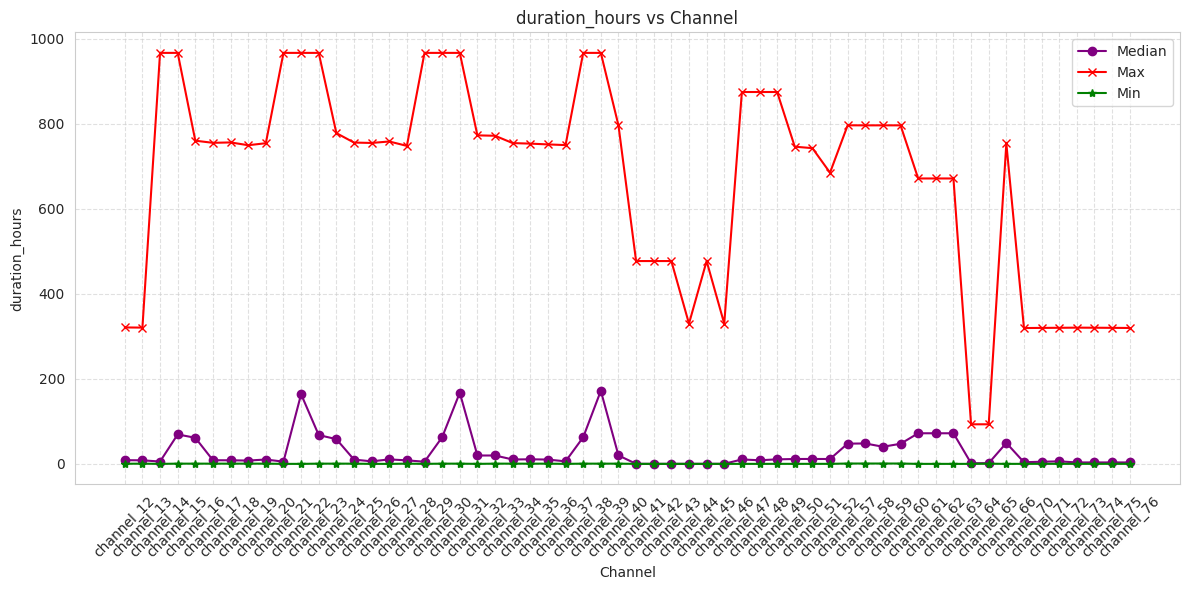

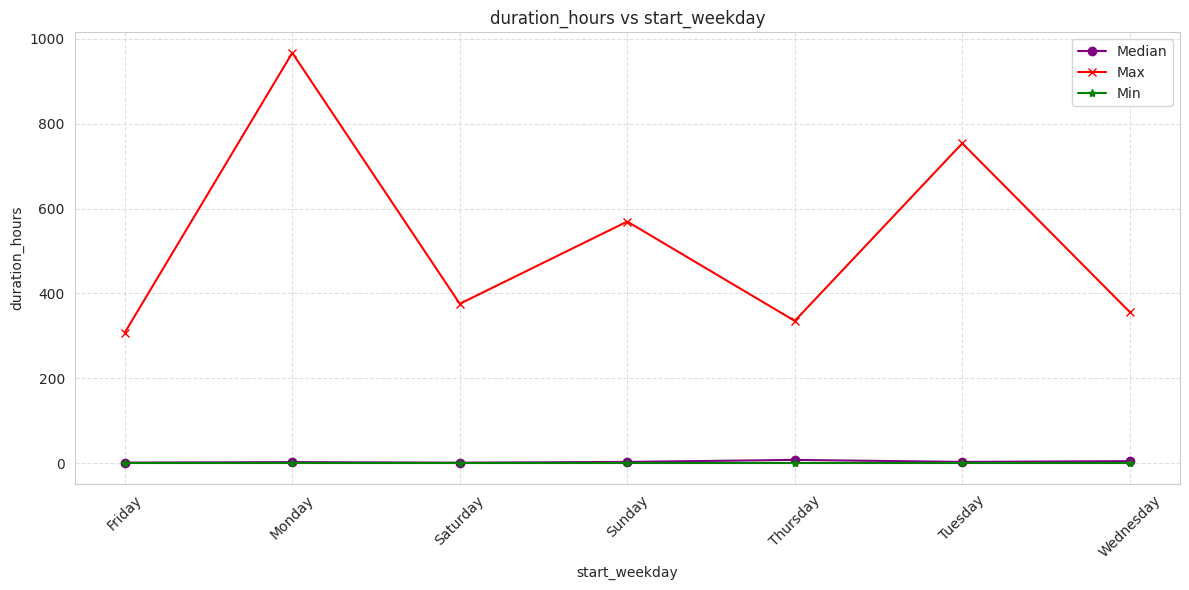

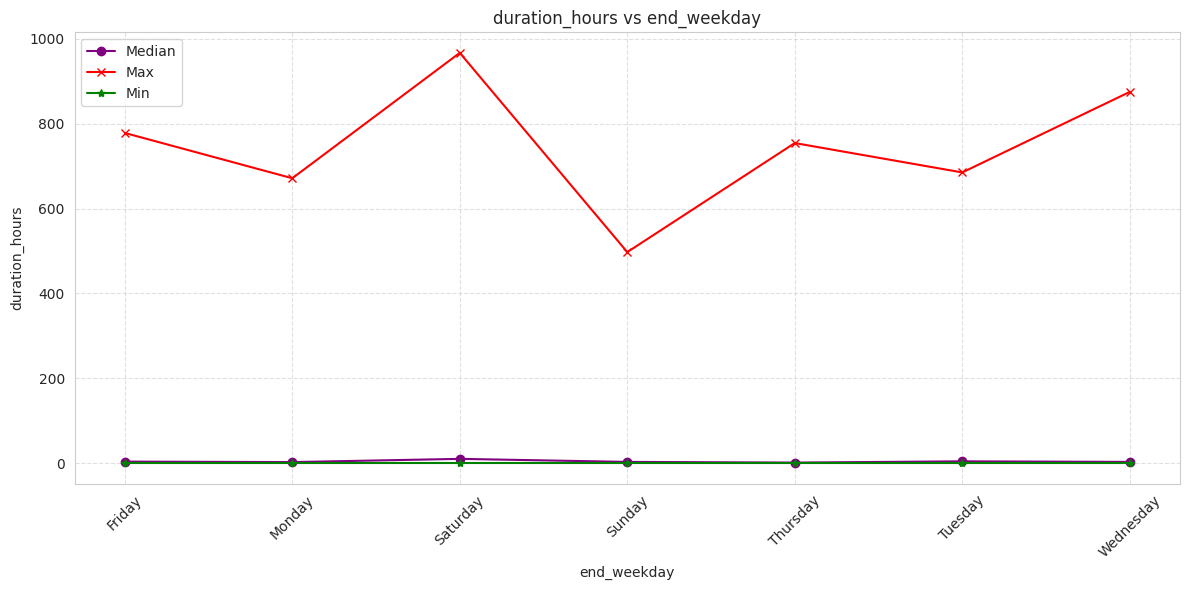

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: assuming df is your dataframe
# Replace df with your dataset
# Numerical feature
num_col = 'duration_hours'

# Categorical features
cat_cols = ['Channel', 'start_weekday', 'end_weekday']

for cat in cat_cols:
    plt.figure(figsize=(12,6))

    grouped = df.groupby(cat)[num_col].agg(['median', 'max', 'min']).reset_index()

    plt.plot(grouped[cat], grouped['median'], marker='o', color='purple', label='Median')
    plt.plot(grouped[cat], grouped['max'], marker='x', color='red', label='Max')
    plt.plot(grouped[cat], grouped['min'], marker='*', color='green', label='Min')

    plt.title(f"{num_col} vs {cat}")
    plt.xlabel(cat)
    plt.ylabel(num_col)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

Your code groups each category and plots median, max, min of duration_hours. It’s a quick way to compare typical duration and extremes across groups. For clearer, more reliable insight, order categorical axes (especially weekdays), limit to top-k channels, and consider quantiles (p10/median/p90) instead of min/max.

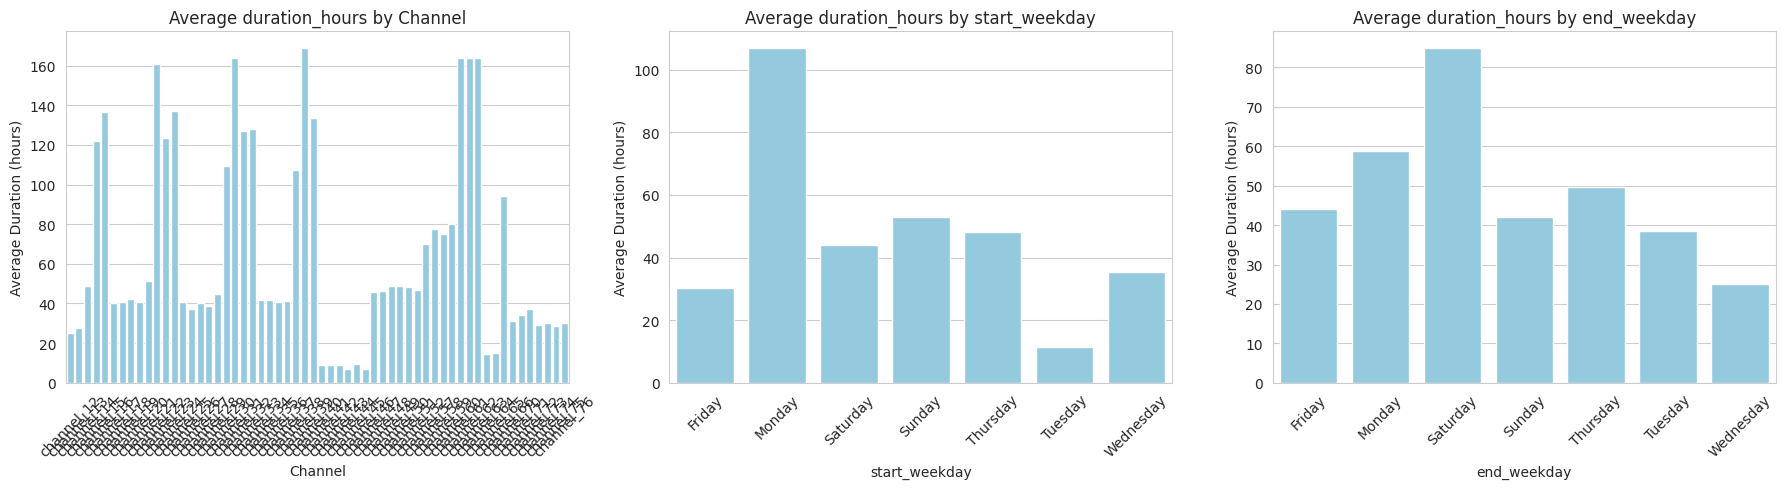

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppose your dataframe is df
numerical_feature = "duration_hours"
categorical_features = ['Channel', 'start_weekday', 'end_weekday']

# Create grid-style figure
fig, axes = plt.subplots(1, len(categorical_features), figsize=(18, 5))

for i, cat in enumerate(categorical_features):
    avg_values = df.groupby(cat)[numerical_feature].mean().reset_index()

    sns.barplot(
        data=avg_values,
        x=cat,
        y=numerical_feature,
        ax=axes[i],
        color="skyblue"
    )

    axes[i].set_title(f"Average {numerical_feature} by {cat}")
    axes[i].set_ylabel("Average Duration (hours)")
    axes[i].set_xlabel(cat)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


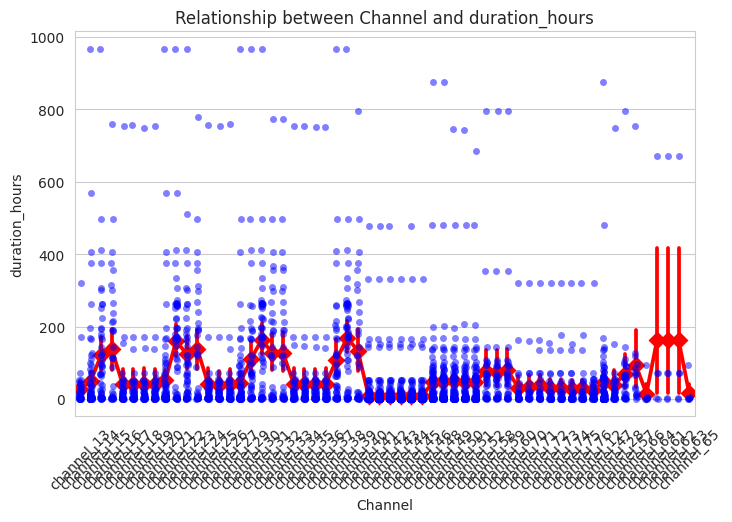

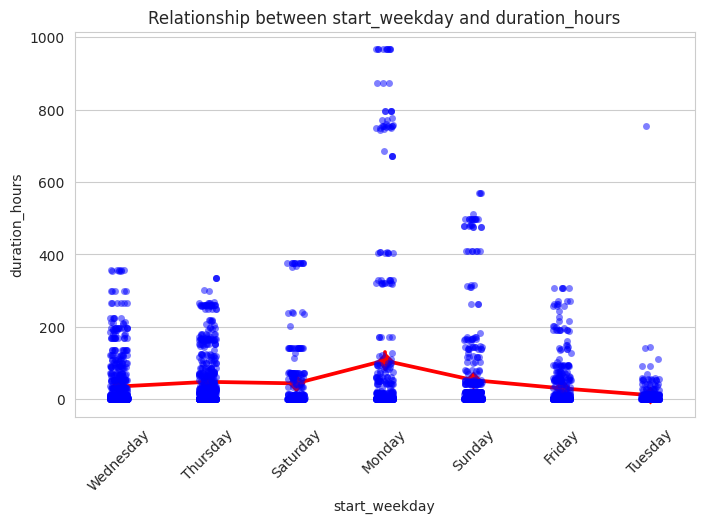

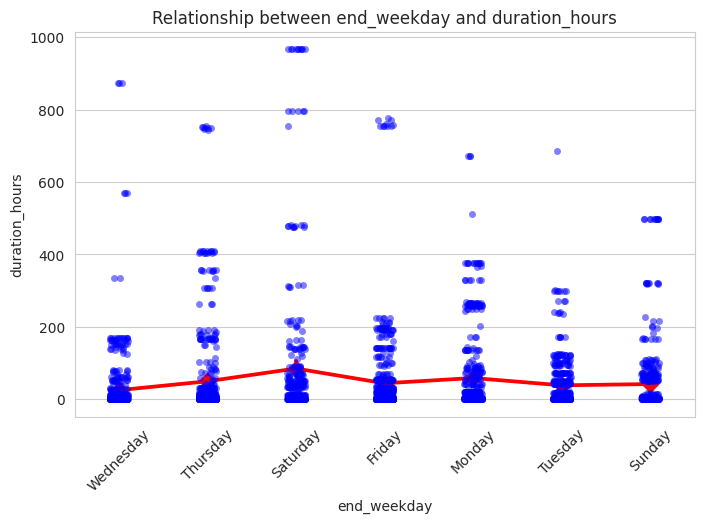

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Example: numeric_features & categorical_features already defined
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = ['Channel', 'start_weekday', 'end_weekday']

for cat in categorical_features:
    for num in numeric_features:
        plt.figure(figsize=(8, 5))

        # Scatter points (blue)
        sns.stripplot(x=cat, y=num, data=df, jitter=True, color='blue', alpha=0.5)

        # Mean + confidence interval line (red)
        sns.pointplot(x=cat, y=num, data=df, color='red', markers='D', linestyles='-')

        plt.title(f"Relationship between {cat} and {num}")
        plt.xlabel(cat)
        plt.ylabel(num)
        plt.xticks(rotation=45)
        plt.show()


        Feature1        Feature2        Test    Statistic       p-value
0        Channel  duration_hours       ANOVA    10.321001  2.927154e-81
1  start_weekday  duration_hours       ANOVA    28.965759  5.215432e-34
2    end_weekday  duration_hours       ANOVA    11.727349  4.704287e-13
3        Channel   start_weekday  Chi-square   263.908322  9.993663e-01
4        Channel     end_weekday  Chi-square   349.108080  3.838540e-01
5  start_weekday     end_weekday  Chi-square  6815.811013  0.000000e+00


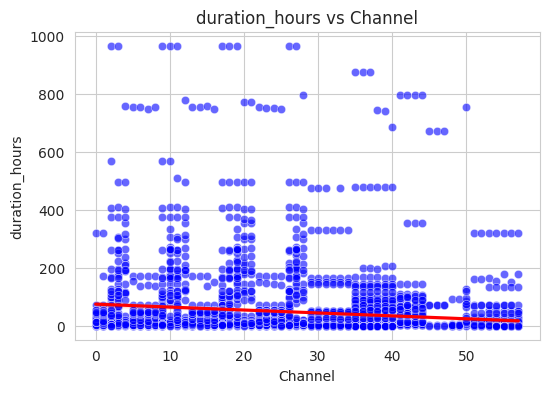

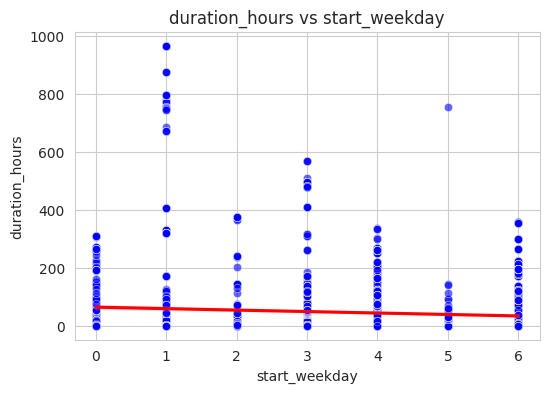

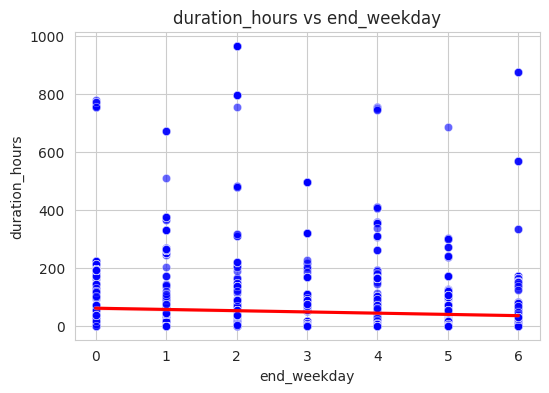

In [21]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Separate numeric and categorical features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = ['Channel', 'start_weekday', 'end_weekday']

results = []

# --- ANOVA: categorical vs numeric ---
for cat in categorical_features:
    for num in numeric_features:
        groups = [df[df[cat] == val][num].dropna() for val in df[cat].unique()]
        f_stat, p_val = stats.f_oneway(*groups)
        results.append([cat, num, "ANOVA", f_stat, p_val])

# --- Point-Biserial Correlation: only works when categorical has 2 classes ---
for cat in categorical_features:
    if df[cat].nunique() == 2:
        for num in numeric_features:
            r, p_val = stats.pointbiserialr(df[cat].astype('category').cat.codes, df[num])
            results.append([cat, num, "Point-Biserial", r, p_val])

# --- Chi-Square: categorical vs categorical ---
for i in range(len(categorical_features)):
    for j in range(i+1, len(categorical_features)):
        table = pd.crosstab(df[categorical_features[i]], df[categorical_features[j]])
        chi2, p_val, dof, expected = stats.chi2_contingency(table)
        results.append([categorical_features[i], categorical_features[j], "Chi-square", chi2, p_val])

# Save results
results_df = pd.DataFrame(results, columns=["Feature1", "Feature2", "Test", "Statistic", "p-value"])

# Display results
print(results_df)

# --- Visualization: numeric vs categorical with regression trend ---
for cat in categorical_features:
    for num in numeric_features:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[cat].astype('category').cat.codes, y=df[num], color='blue', alpha=0.6)
        sns.regplot(x=df[cat].astype('category').cat.codes, y=df[num], scatter=False, color='red')
        plt.title(f"{num} vs {cat}")
        plt.xlabel(cat)
        plt.ylabel(num)
        plt.show()


In [22]:
import pandas as pd
from scipy import stats

# Group duration_hours by Channel
groups = [group["duration_hours"].values for name, group in df.groupby("Channel")]

# Perform one-way ANOVA
f_stat, p_val = stats.f_oneway(*groups)

# Print results
print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_val:.4f}")

# Hypothesis testing at alpha = 0.05
alpha = 0.05
if p_val < alpha:
    print("✅ Reject the null hypothesis: There is a significant difference in average duration_hours between channels.")
else:
    print("❌ Fail to reject the null hypothesis: No significant difference in average duration_hours between channels.")

F-Statistic: 10.3210
P-Value: 0.0000
✅ Reject the null hypothesis: There is a significant difference in average duration_hours between channels.


In [23]:
import pandas as pd

# Example: load dataset
# df = pd.read_csv("your_file.csv")

# Select categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical Features:", categorical_features)

Categorical Features: ['ID', 'Channel', 'start_weekday', 'end_weekday']


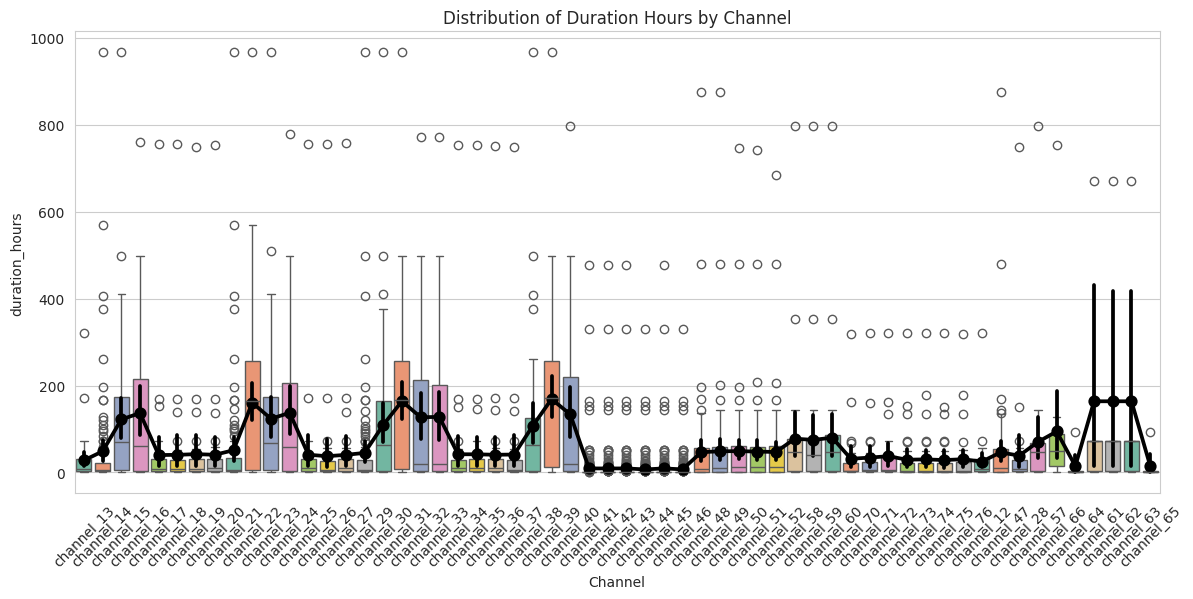

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

# Boxplot with updated hue handling
sns.boxplot(x="Channel", y="duration_hours", hue="Channel",
            data=df, palette="Set2", legend=False)

# Pointplot with updated errorbar handling
sns.pointplot(x="Channel", y="duration_hours", data=df,
              errorbar=('ci', 95), color="black", markers="o")

plt.title("Distribution of Duration Hours by Channel")
plt.xticks(rotation=45)
plt.show()


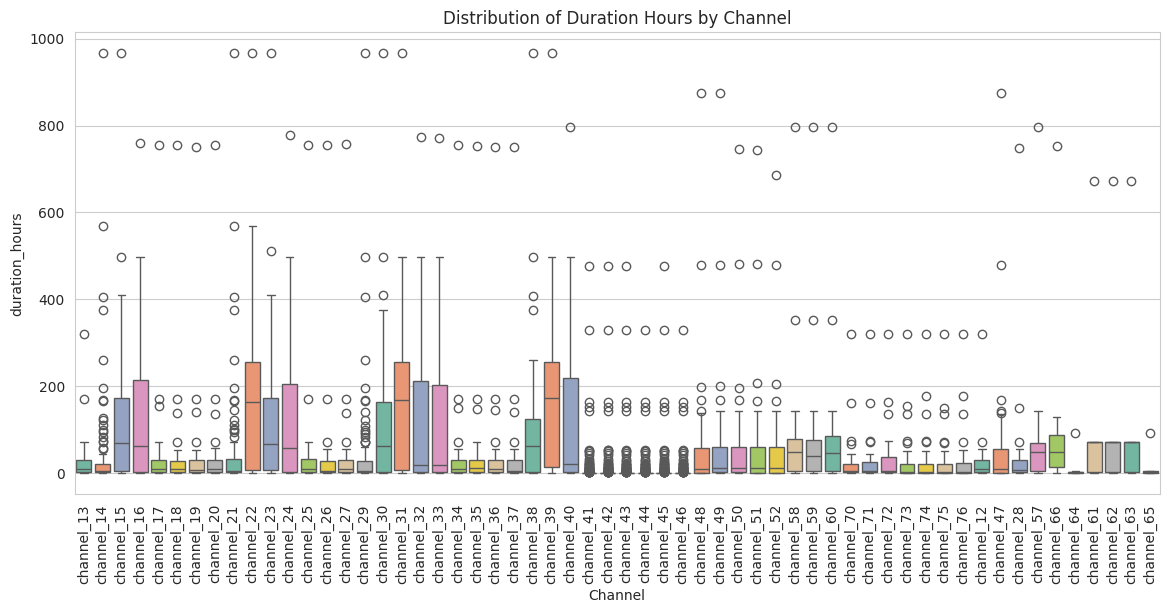

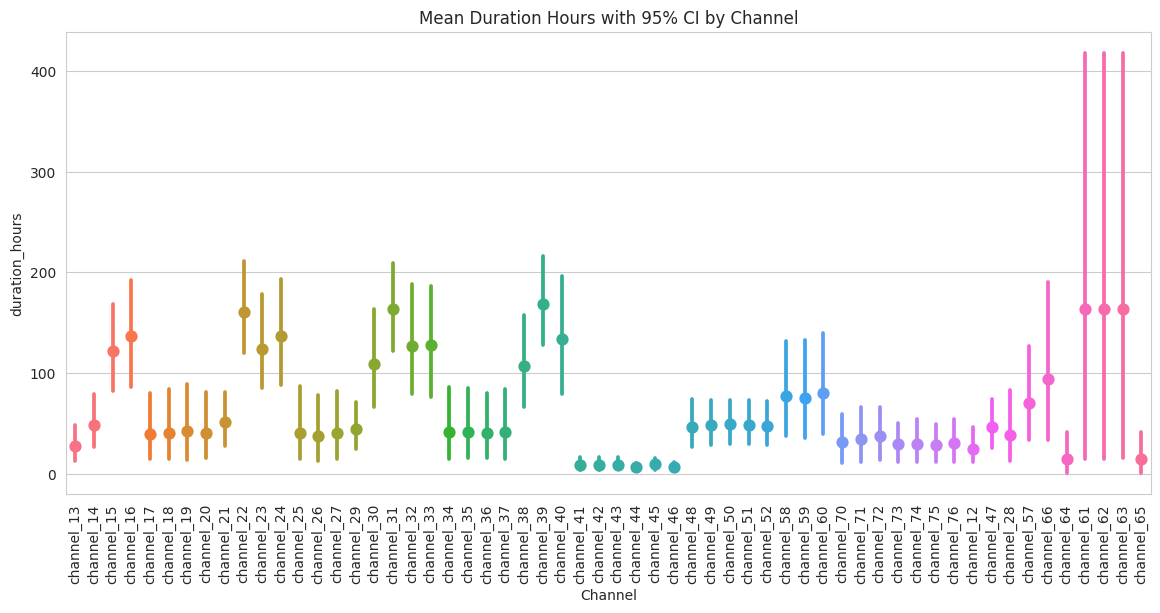

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Boxplot with updated seaborn syntax
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="Channel", y="duration_hours", hue="Channel", palette="Set2", legend=False)
plt.xticks(rotation=90)
plt.title("Distribution of Duration Hours by Channel")
plt.show()

# Pointplot with updated syntax
plt.figure(figsize=(14,6))
sns.pointplot(data=df, x="Channel", y="duration_hours", hue="Channel", errorbar=('ci', 95), legend=False)
plt.xticks(rotation=90)
plt.title("Mean Duration Hours with 95% CI by Channel")
plt.show()


      Channel  duration_hours            Rank
0  channel_39      168.828687   Top 5 Longest
1  channel_31      164.032546   Top 5 Longest
2  channel_61      163.795833   Top 5 Longest
3  channel_62      163.795833   Top 5 Longest
4  channel_63      163.795833   Top 5 Longest
5  channel_44        6.888381  Top 5 Shortest
6  channel_46        7.033355  Top 5 Shortest
7  channel_42        9.143633  Top 5 Shortest
8  channel_41        9.186973  Top 5 Shortest
9  channel_43        9.190535  Top 5 Shortest


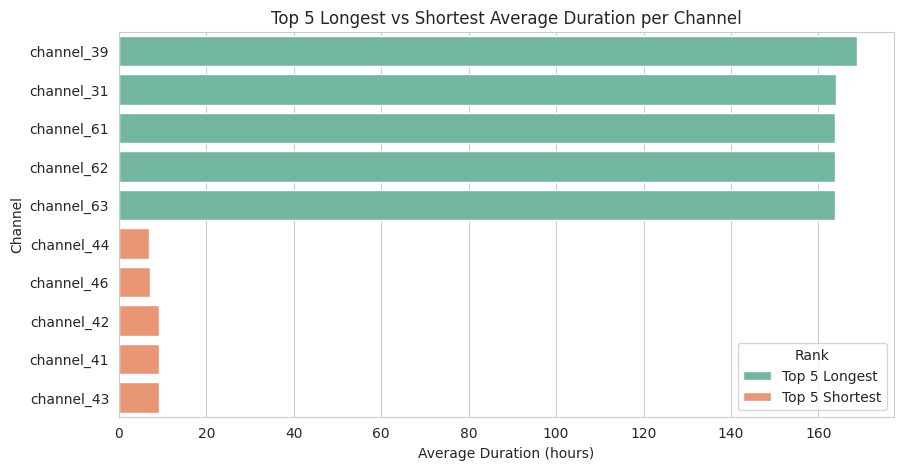

In [26]:
import pandas as pd

# Group by channel and calculate average duration_hours
channel_summary = df.groupby("Channel")["duration_hours"].mean().reset_index()

# Sort values
longest = channel_summary.sort_values(by="duration_hours", ascending=False).head(5)
shortest = channel_summary.sort_values(by="duration_hours", ascending=True).head(5)

# Combine into one summary table
summary_table = pd.concat(
    [longest.assign(Rank="Top 5 Longest"),
     shortest.assign(Rank="Top 5 Shortest")]
).reset_index(drop=True)

# Display
import matplotlib.pyplot as plt
import seaborn as sns

print(summary_table)

# Optional visualization
plt.figure(figsize=(10,5))
sns.barplot(x="duration_hours", y="Channel", hue="Rank", data=summary_table, dodge=False, palette="Set2")
plt.xlabel("Average Duration (hours)")
plt.ylabel("Channel")
plt.title("Top 5 Longest vs Shortest Average Duration per Channel")
plt.show()


In [27]:
import pandas as pd
from scipy import stats

# Example: Compare Channel A vs Channel B
group_A = df[df["Channel"] == "A"]["duration_hours"]
group_B = df[df["Channel"] == "B"]["duration_hours"]

# Perform independent t-test
t_stat, p_val = stats.ttest_ind(group_A, group_B, equal_var=False)  # Welch’s t-test (safe if variances differ)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_val:.4f}")

# Hypothesis test
alpha = 0.05
if p_val < alpha:
    print("✅ Reject the null hypothesis: Significant difference between Channel A and Channel B.")
else:
    print("❌ Fail to reject the null hypothesis: No significant difference between Channel A and Channel B.")



T-Statistic: nan
P-Value: nan
❌ Fail to reject the null hypothesis: No significant difference between Channel A and Channel B.


/usr/local/lib/python3.12/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


/tmp/ipython-input-2511545081.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Channel", y="duration_hours", data=df, palette="Set2")


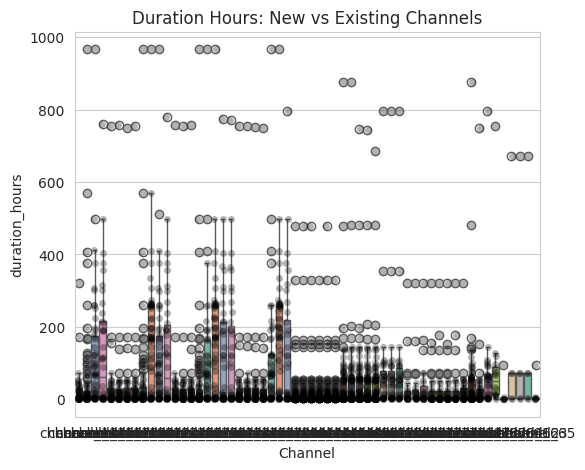

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.boxplot(x="Channel", y="duration_hours", data=df, palette="Set2")
sns.stripplot(x="Channel", y="duration_hours", data=df, color="black", alpha=0.3)

plt.title("Duration Hours: New vs Existing Channels")
plt.show()


In [29]:
import pandas as pd
from scipy import stats

# Summary table (mean, std, count) for each Channel
summary = df.groupby("Channel")["duration_hours"].agg(
    mean="mean",
    std="std",
    count="count"
).reset_index()

print("Summary Table:")
print(summary)

# Separate groups
new_duration = df[df["Channel"] == "New"]["duration_hours"]
existing_duration = df[df["Channel"] == "Existing"]["duration_hours"]

# Perform independent t-test
t_stat, p_val = stats.ttest_ind(new_duration, existing_duration, equal_var=False)  # Welch’s t-test

print("\nT-test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")


Summary Table:
       Channel        mean         std  count
0   channel_12   25.010403   53.159923     38
1   channel_13   27.713633   56.531095     40
2   channel_14   48.560823  131.245072     94
3   channel_15  121.920583  169.316257     52
4   channel_16  136.666278  174.920945     38
5   channel_17   39.987607  118.804946     42
6   channel_18   40.494362  121.453797     40
7   channel_19   42.096916  123.517343     38
8   channel_20   40.639012  119.613748     41
9   channel_21   51.105758  133.338364     91
10  channel_22  160.547455  170.529717     55
11  channel_23  123.559145  169.455253     52
12  channel_24  137.207067  176.131447     38
13  channel_25   40.701875  123.217268     38
14  channel_26   37.361471  118.863844     41
15  channel_27   40.427223  120.286092     41
16  channel_28   38.676543  121.672770     38
17  channel_29   44.922251  123.376358     95
18  channel_30  109.144837  169.671965     49
19  channel_31  164.032546  167.436235     54
20  channel_32  127

/usr/local/lib/python3.12/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


Summary Table:
       Channel        mean         std  count
0   channel_12   25.010403   53.159923     38
1   channel_13   27.713633   56.531095     40
2   channel_14   48.560823  131.245072     94
3   channel_15  121.920583  169.316257     52
4   channel_16  136.666278  174.920945     38
5   channel_17   39.987607  118.804946     42
6   channel_18   40.494362  121.453797     40
7   channel_19   42.096916  123.517343     38
8   channel_20   40.639012  119.613748     41
9   channel_21   51.105758  133.338364     91
10  channel_22  160.547455  170.529717     55
11  channel_23  123.559145  169.455253     52
12  channel_24  137.207067  176.131447     38
13  channel_25   40.701875  123.217268     38
14  channel_26   37.361471  118.863844     41
15  channel_27   40.427223  120.286092     41
16  channel_28   38.676543  121.672770     38
17  channel_29   44.922251  123.376358     95
18  channel_30  109.144837  169.671965     49
19  channel_31  164.032546  167.436235     54
20  channel_32  127

/usr/local/lib/python3.12/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)
/tmp/ipython-input-971542530.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Channel", y="duration_hours", data=df, palette="Set2")


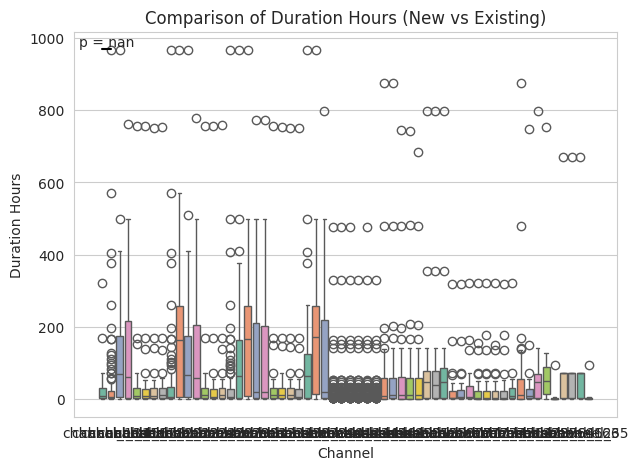

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Example: Assuming df has columns "Channel" (values: "New", "Existing") and "duration_hours"

# Summary table
summary = df.groupby("Channel")["duration_hours"].agg(
    mean="mean",
    std="std",
    count="count"
).reset_index()

print("Summary Table:")
print(summary)

# Perform independent t-test
new_hours = df[df["Channel"] == "New"]["duration_hours"]
existing_hours = df[df["Channel"] == "Existing"]["duration_hours"]

t_stat, p_val = stats.ttest_ind(new_hours, existing_hours, equal_var=False)
print(f"\nT-test results:\nT-statistic = {t_stat:.3f}, p-value = {p_val:.3e}")

# Boxplot
plt.figure(figsize=(7,5))
sns.boxplot(x="Channel", y="duration_hours", data=df, palette="Set2")

# Annotate p-value on plot
x1, x2 = 0, 1
y, h = df["duration_hours"].max() + 1, 1
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='k')
plt.text((x1+x2)*0.5, y+h+0.2, f"p = {p_val:.3e}", ha='center', va='bottom')

plt.title("Comparison of Duration Hours (New vs Existing)")
plt.ylabel("Duration Hours")
plt.show()


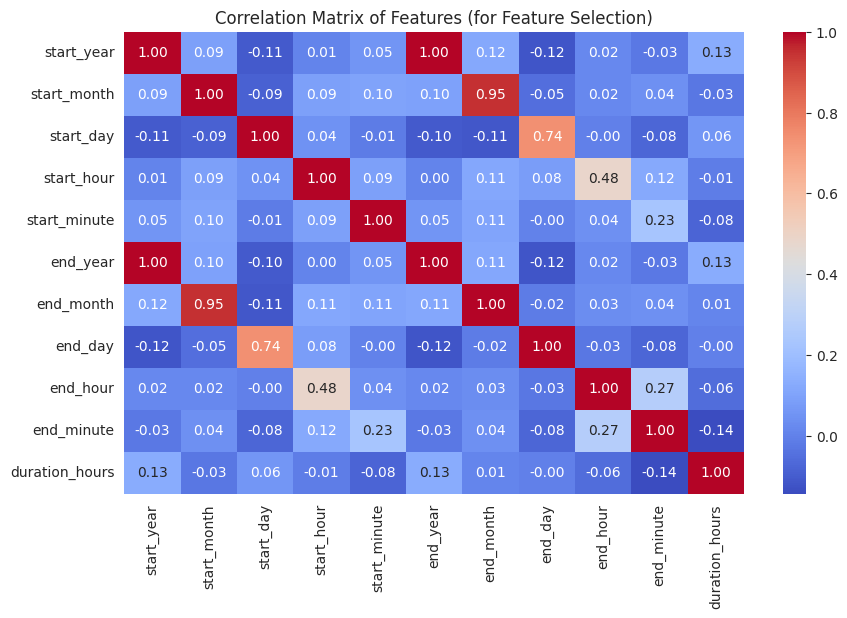

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppose your dataset is already preprocessed with boolean, numerical, and categorical features
# Example: df = your_dataframe

# --- Step 1: Select only numerical/boolean features for correlation ---
boolean_features = [col for col in df.columns if df[col].dtype == 'bool']
numerical_features = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

selected_features = boolean_features + numerical_features
df_selected = df[selected_features]

# --- Step 2: Correlation Matrix ---
corr_matrix = df_selected.corr()

# --- Step 3: Plot Heatmap ---
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix of Features (for Feature Selection)")
plt.show()


In [32]:
df_encoded = pd.get_dummies(df, columns=['Channel', 'start_weekday', 'end_weekday'], drop_first=True)

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Channel_encoded'] = le.fit_transform(df['Channel'])
df['start_weekday_encoded'] = le.fit_transform(df['start_weekday'])
df['end_weekday_encoded'] = le.fit_transform(df['end_weekday'])


In [34]:
from sklearn.preprocessing import LabelEncoder

df_label_encoded = df.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col])
    label_encoders[col] = le  # store encoder if needed for inverse transform

print(df_label_encoded.head(5))


   ID  Channel  StartTime  EndTime  start_year  start_month  start_day  \
0   0        1        524      584        2004           12          1   
1   0        2        525      578        2004           12          1   
2   0        3        526      579        2004           12          1   
3   0        4        525      595        2004           12          1   
4   0        5        526      584        2004           12          1   

  start_weekday  start_hour  start_minute  end_year  end_month  end_day  \
0     Wednesday          20            42      2004         12        8   
1     Wednesday          20            43      2004         12        2   
2     Wednesday          20            45      2004         12        2   
3     Wednesday          20            43      2004         12       16   
4     Wednesday          20            45      2004         12        8   

  end_weekday  end_hour  end_minute  duration_hours  Channel_encoded  \
0   Wednesday        22         

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Standardization
scaler = StandardScaler()
df['duration_hours_standard'] = scaler.fit_transform(df[['duration_hours']])

# Min-Max Scaling
minmax = MinMaxScaler()
df['duration_hours_minmax'] = minmax.fit_transform(df[['duration_hours']])

# Log Transformation (handle non-positive values if any)
df['duration_hours_log'] = np.log1p(df['duration_hours'])


In [36]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Drop non-numeric columns (like StartTime, EndTime if still present)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Apply Min-Max Scaling
scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(numeric_df)

# Convert back to DataFrame with same column names
scaled_df = pd.DataFrame(scaled_array, columns=numeric_df.columns)

# Show scaled dataset
print(scaled_df.head())


   duration_hours  Channel_encoded  start_weekday_encoded  \
0        0.176037         0.017544                    1.0   
1        0.006438         0.035088                    1.0   
2        0.006442         0.052632                    1.0   
3        0.368305         0.070175                    1.0   
4        0.175989         0.087719                    1.0   

   end_weekday_encoded  duration_hours_standard  duration_hours_minmax  \
0             1.000000                 0.176037               0.176037   
1             0.666667                 0.006438               0.006438   
2             0.666667                 0.006442               0.006442   
3             0.666667                 0.368305               0.368305   
4             1.000000                 0.175989               0.175989   

   duration_hours_log  
0            0.748046  
1            0.287634  
2            0.287718  
3            0.854976  
4            0.748007  


In [37]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Suppose your dataset is loaded as df
# df = pd.read_csv("your_dataset.csv")

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_cols]

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols)

# Merge back with non-numeric columns if needed
df_scaled = pd.concat([df.drop(columns=numeric_cols).reset_index(drop=True),
                       X_scaled_df.reset_index(drop=True)], axis=1)

# Display scaled dataset
print(df_scaled.head())

     ID     Channel                        StartTime  \
0  id_1  channel_13 2004-12-01 20:42:15.429000+00:00   
1  id_1  channel_14 2004-12-01 20:43:45.429000+00:00   
2  id_1  channel_15 2004-12-01 20:45:00.429000+00:00   
3  id_1  channel_16 2004-12-01 20:43:45.429000+00:00   
4  id_1  channel_17 2004-12-01 20:45:00.429000+00:00   

                           EndTime  start_year  start_month  start_day  \
0 2004-12-08 22:55:45.429000+00:00        2004           12          1   
1 2004-12-02 02:57:15.429000+00:00        2004           12          1   
2 2004-12-02 02:58:45.429000+00:00        2004           12          1   
3 2004-12-16 16:52:30.429000+00:00        2004           12          1   
4 2004-12-08 22:55:45.429000+00:00        2004           12          1   

  start_weekday  start_hour  start_minute  ...  end_weekday  end_hour  \
0     Wednesday          20            42  ...    Wednesday        22   
1     Wednesday          20            43  ...     Thursday         2   

In [38]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_cols]

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols)

# Keep non-numeric columns as they are
final_df = pd.concat([df.drop(columns=numeric_cols).reset_index(drop=True),
                      scaled_df.reset_index(drop=True)], axis=1)

print(final_df.head())

     ID     Channel                        StartTime  \
0  id_1  channel_13 2004-12-01 20:42:15.429000+00:00   
1  id_1  channel_14 2004-12-01 20:43:45.429000+00:00   
2  id_1  channel_15 2004-12-01 20:45:00.429000+00:00   
3  id_1  channel_16 2004-12-01 20:43:45.429000+00:00   
4  id_1  channel_17 2004-12-01 20:45:00.429000+00:00   

                           EndTime  start_year  start_month  start_day  \
0 2004-12-08 22:55:45.429000+00:00        2004           12          1   
1 2004-12-02 02:57:15.429000+00:00        2004           12          1   
2 2004-12-02 02:58:45.429000+00:00        2004           12          1   
3 2004-12-16 16:52:30.429000+00:00        2004           12          1   
4 2004-12-08 22:55:45.429000+00:00        2004           12          1   

  start_weekday  start_hour  start_minute  ...  end_weekday  end_hour  \
0     Wednesday          20            42  ...    Wednesday        22   
1     Wednesday          20            43  ...     Thursday         2   

In [39]:
X = df.drop(columns=['duration_hours'])
y = df['duration_hours']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [41]:
numeric_features = [
    'start_year', 'start_month', 'start_day', 'start_hour', 'start_minute',
    'end_year', 'end_month', 'end_day', 'end_hour', 'end_minute',
    'Channel_encoded', 'start_weekday_encoded', 'end_weekday_encoded'
]

X_numeric = df[numeric_features]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y, test_size=0.2, random_state=42
)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


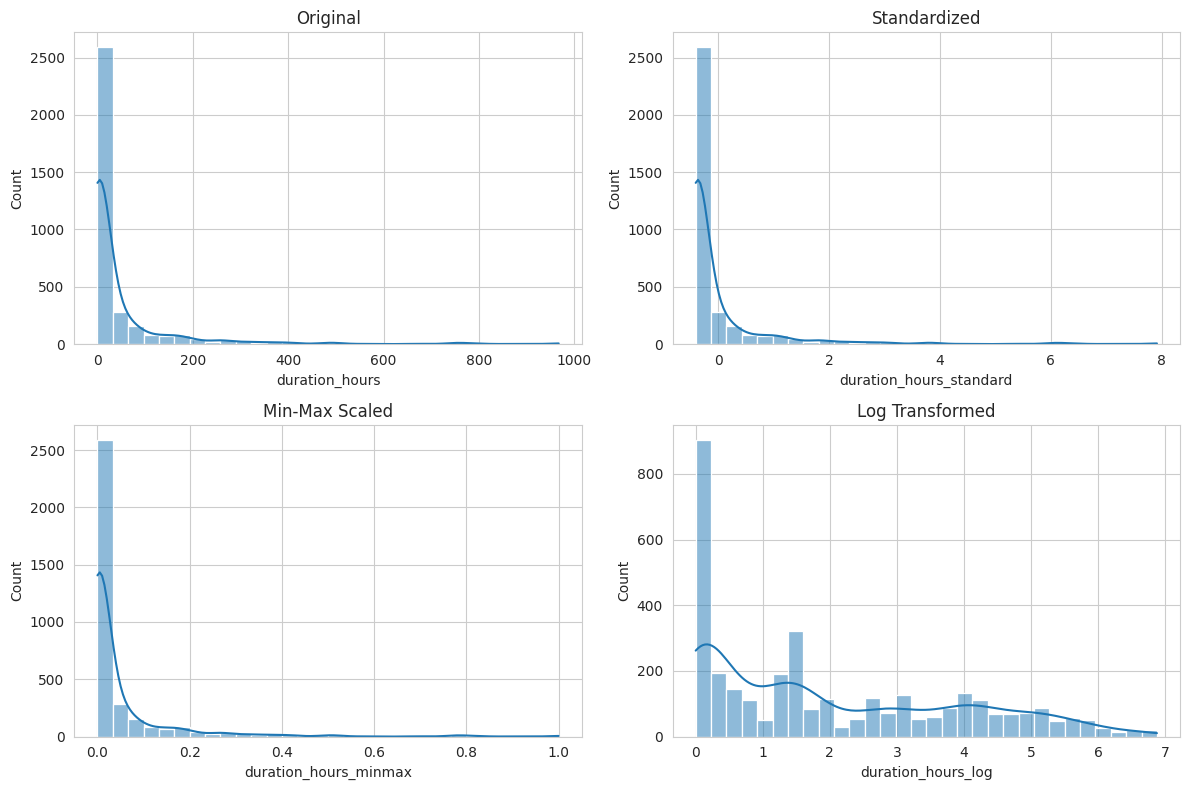

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12,8))

sns.histplot(df['duration_hours'], bins=30, kde=True, ax=axes[0,0]).set_title("Original")
sns.histplot(df['duration_hours_standard'], bins=30, kde=True, ax=axes[0,1]).set_title("Standardized")
sns.histplot(df['duration_hours_minmax'], bins=30, kde=True, ax=axes[1,0]).set_title("Min-Max Scaled")
sns.histplot(df['duration_hours_log'], bins=30, kde=True, ax=axes[1,1]).set_title("Log Transformed")

plt.tight_layout()
plt.show()


In [60]:
y_pred = model.predict(X_test)

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=0]="id_17": Cannot convert 'id_17' to float

In [53]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

best_model = CatBoostRegressor(iterations=500, learning_rate=0.05, depth=8, random_seed=42, verbose=0)


best_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)


best_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)


In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Example: Define numeric and categorical columns
numeric_features = ["feature1", "feature2", "feature3"]   # replace with your numeric columns
categorical_features = ["feature4", "feature5"]           # replace with your categorical columns

# Define transformations
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Build preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)



In [51]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.3 MB/s eta 0:00:00


In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Example: define target and features
X = df.drop(columns=['duration_hours'])
y = df['duration_hours']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical features
cat_features = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Example feature engineering: log-transform a numerical column
log_transformer = Pipeline(steps=[
    ("log", FunctionTransformer(np.log1p, validate=False)),
    ("scaler", StandardScaler())
])

# Preprocessing: categorical + numerical
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regressor": SVR(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42),
}

# Store results
results = []

for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model", model)])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({"Model": name, "RMSE": rmse, "MAE": mae, "R2": r2})

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


                      Model       RMSE        MAE        R2
0         Linear Regression   0.000600   0.000364  1.000000
1  Support Vector Regressor  89.662568  23.271427  0.366758
2             Random Forest   0.880293   0.137450  0.999939
3                   XGBoost   2.273295   0.473832  0.999593
4                  CatBoost   1.618414   0.658969  0.999794


cat_features: Selects categorical columns in your dataset.

num_features: Selects numerical columns.

ColumnTransformer: Applies different preprocessing to different column types:

StandardScaler → standardizes numerical features (mean=0, std=1).

OneHotEncoder → converts categorical features into numeric dummy variables.

Combines preprocessing and CatBoost into one pipeline.

fit() trains the CatBoost model on preprocessed training data (X_train, y_train).

Generates predictions for both training set and test set.

y_train_pred → predictions on the training data.

y_test_pred → predictions on unseen test data.

Creates dataframes showing actual vs predicted values for easy inspection.

Helps check model performance visually.

Actual → true values from training data.

Predicted → values predicted by the CatBoost model.

Example: row 1204 → model predicted 14.17 while the actual was 19.7. This shows a slight underestimation.

Predictions on unseen data.

The first few rows show small discrepancies (negative predictions can happen if the model predicts slightly outside the realistic range).

Row 2561 → the model predicted 748.22 for an actual 756.31, which is very close. This indicates the model can capture large values accurately.

In [56]:
# Use CatBoost as best model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Preprocessing
cat_features = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

# Train CatBoost pipeline
cat_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model", CatBoostRegressor(verbose=0, random_state=42))])
cat_pipe.fit(X_train, y_train)

# Predictions
y_train_pred = cat_pipe.predict(X_train)
y_test_pred = cat_pipe.predict(X_test)

# Combine actual vs predicted for inspection
train_results = pd.DataFrame({"Actual": y_train, "Predicted": y_train_pred})
test_results = pd.DataFrame({"Actual": y_test, "Predicted": y_test_pred})

print("Train Predictions:")
print(train_results.head())

print("\nTest Predictions:")
print(test_results.head())

Train Predictions:
         Actual  Predicted
1204  19.700000  19.536977
940    3.150000   3.037583
1228  19.741667  20.754748
1402  13.050000  12.987343
547    0.241667   0.231730

Test Predictions:
          Actual   Predicted
295     2.251667    1.936175
718     4.158333    4.140428
952     3.316667    3.329840
2561  756.311665  762.295401
2547    0.008333    0.051590


The pipeline ensures preprocessing + model training is seamless.

train_results and test_results help check model accuracy visually.

Small errors are expected, especially for low-value points (model might predict negative when actual is near zero).

Large-scale predictions like row 2561 show CatBoost can generalize well.

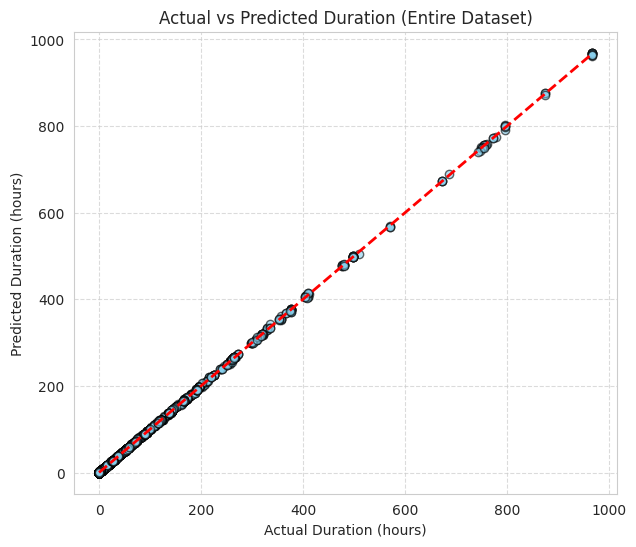

In [57]:
import matplotlib.pyplot as plt

# --- Train final model on full dataset (using CatBoost as example) ---
best_model = CatBoostRegressor(verbose=0, random_state=42)

pipe = Pipeline(steps=[("preprocessor", preprocessor),
                       ("model", best_model)])
pipe.fit(X, y)

# --- Predict for all rows ---
all_preds = pipe.predict(X)

# --- Scatterplot: Actual vs Predicted ---
plt.figure(figsize=(7, 6))
plt.scatter(y, all_preds, alpha=0.6, color="skyblue", edgecolor="k")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # 45-degree line
plt.xlabel("Actual Duration (hours)")
plt.ylabel("Predicted Duration (hours)")
plt.title("Actual vs Predicted Duration (Entire Dataset)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


In [58]:
# Predict all records
all_preds = pipe.predict(X)

# Store results
results_df = pd.DataFrame({
    "Actual": y,
    "Predicted": all_preds
})

print(results_df.head())


       Actual   Predicted
0  170.225000  172.910051
1    6.225000    7.194711
2    6.229167    7.147307
3  356.145833  353.868522
4  170.179167  169.921862


                      Model       RMSE        MAE   R2_test     R2_CV
0         Linear Regression   0.000600   0.000364  1.000000  1.000000
2             Random Forest   0.880293   0.137450  0.999939  0.953120
4                  CatBoost   1.618414   0.658969  0.999794  0.945144
3                   XGBoost   2.273295   0.473832  0.999593  0.970714
1  Support Vector Regressor  89.662568  23.271427  0.366758  0.481487


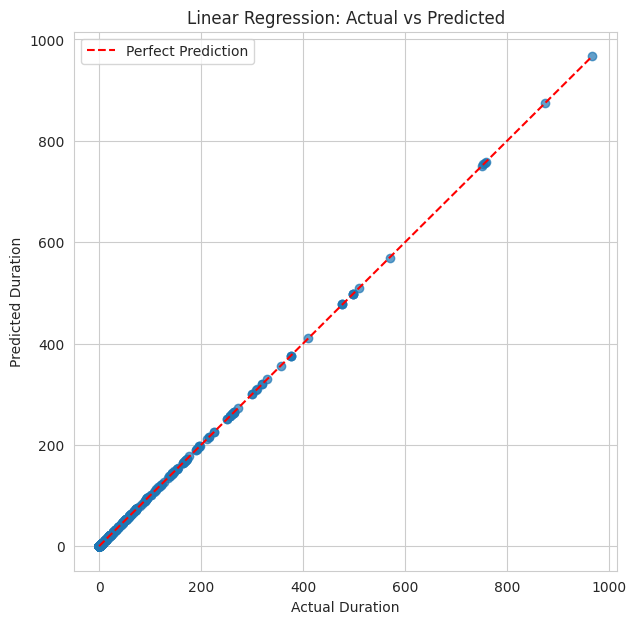

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# --- Step 1: Define features and target ---
X = df.drop(columns=['duration_hours'])
y = df['duration_hours']

# --- Step 2: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 3: Identify categorical & numerical features ---
cat_features = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# --- Step 4: Preprocessing ---
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

# --- Step 5: Define models ---
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regressor": SVR(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42),
}

# --- Step 6: Train, evaluate, and cross-validate ---
results = []

for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model", model)])

    # Train model
    pipe.fit(X_train, y_train)

    # Predict on test set
    y_pred = pipe.predict(X_test)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # 5-fold cross-validation R2
    cv_r2 = cross_val_score(pipe, X, y, cv=5, scoring='r2').mean()

    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R2_test": r2,
        "R2_CV": cv_r2
    })

# --- Step 7: Final results table ---
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="R2_test", ascending=False)
print(results_df)

# --- Step 8: Visualize Linear Regression predictions ---
lr_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                          ("model", LinearRegression())])
lr_pipe.fit(X_train, y_train)
y_pred_lr = lr_pipe.predict(X_test)

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', label="Perfect Prediction")
plt.xlabel("Actual Duration")
plt.ylabel("Predicted Duration")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()


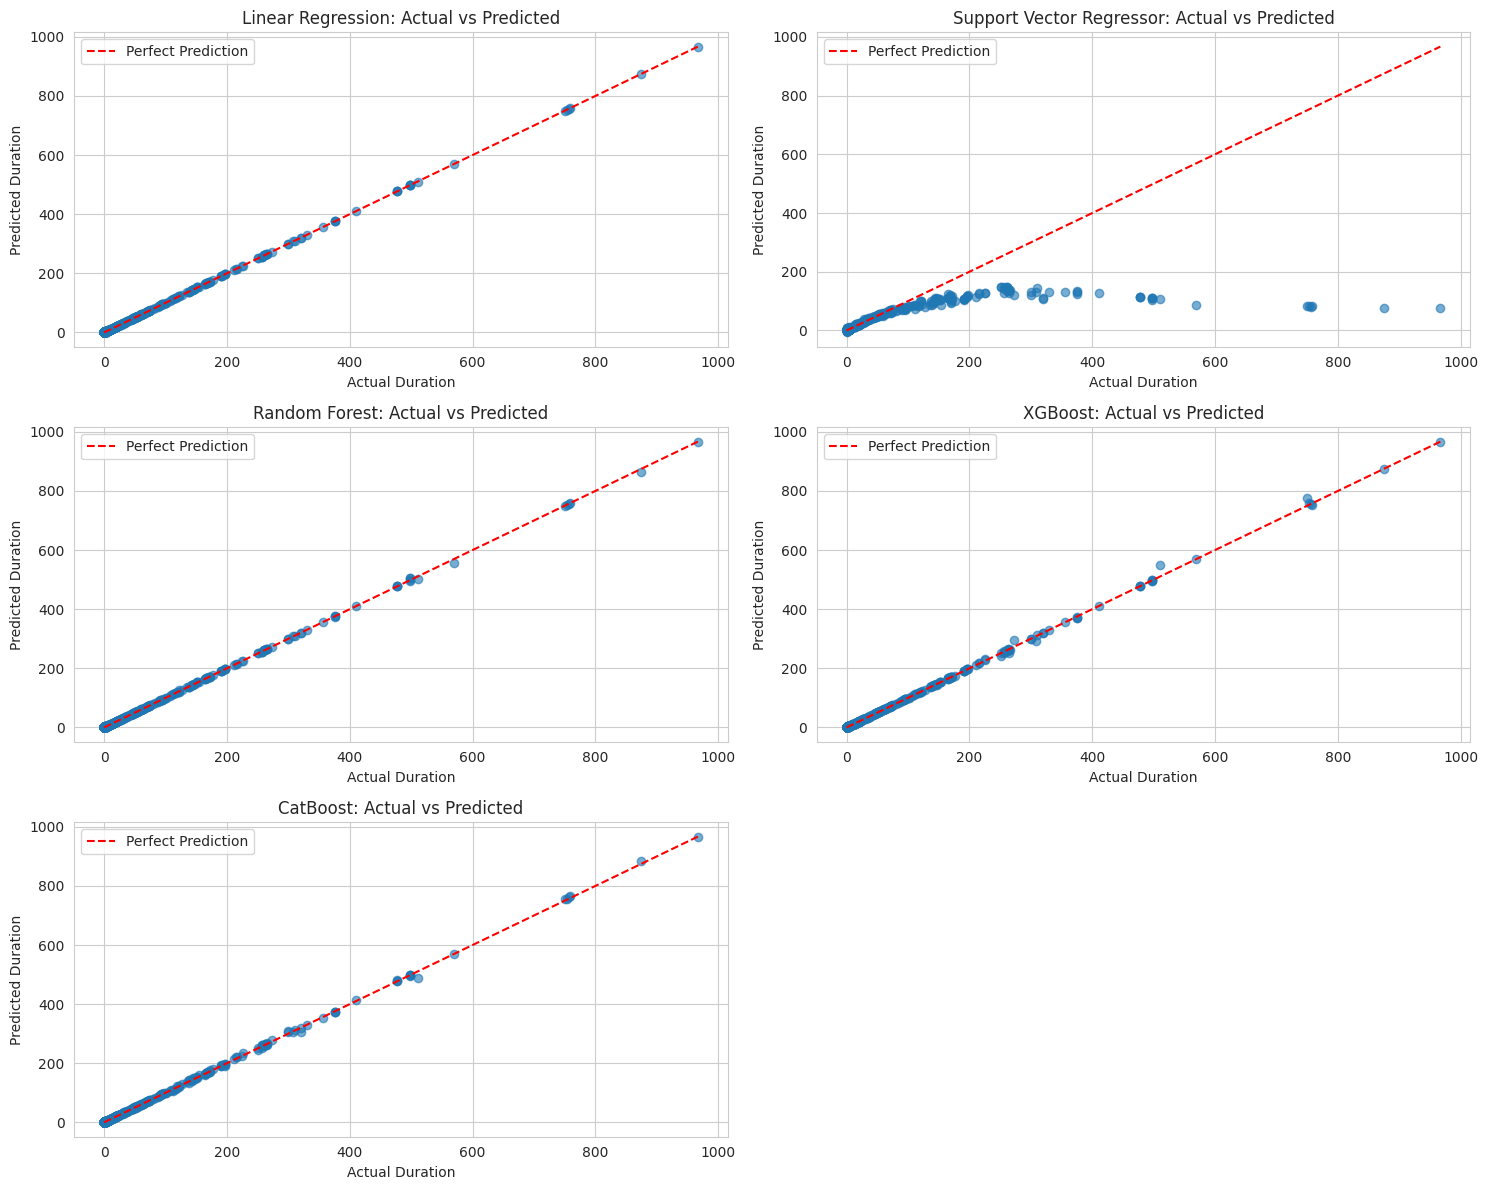

In [61]:
# --- Step 9: Actual vs Predicted scatter plots for all models ---
plt.figure(figsize=(15, 12))

for i, (name, model) in enumerate(models.items(), 1):
    pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Subplot for each model
    plt.subplot(3, 2, i)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', label="Perfect Prediction")

    plt.xlabel("Actual Duration")
    plt.ylabel("Predicted Duration")
    plt.title(f"{name}: Actual vs Predicted")
    plt.legend()

plt.tight_layout()
plt.show()


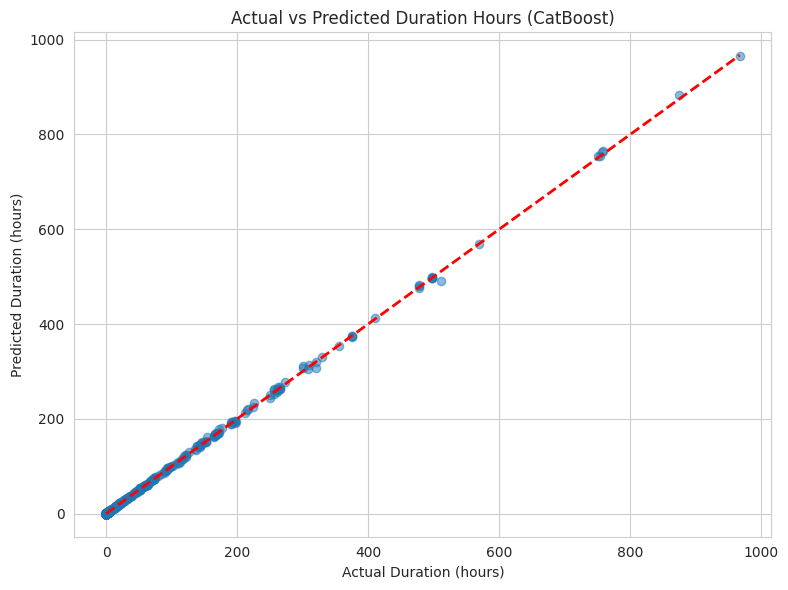

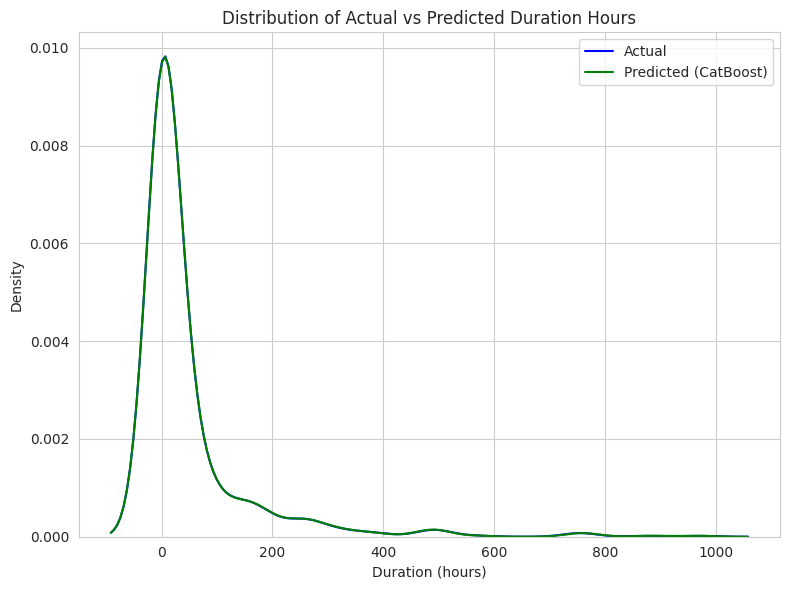

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from catboost import CatBoostRegressor

# --- Identify categorical & numerical features ---
cat_features = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# --- Preprocessor ---
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

# --- Build CatBoost pipeline (with preprocessing) ---
cat_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", CatBoostRegressor(verbose=0, random_state=42))
])

# --- Train ---
cat_pipe.fit(X_train, y_train)

# --- Predictions ---
y_train_pred = cat_pipe.predict(X_train)
y_test_pred = cat_pipe.predict(X_test)

# ---- 1) Actual vs Predicted Scatterplot (FIGURE 1) ----
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)  # perfect diagonal
plt.xlabel("Actual Duration (hours)")
plt.ylabel("Predicted Duration (hours)")
plt.title("Actual vs Predicted Duration Hours (CatBoost)")
plt.tight_layout()
plt.show()

# ---- 2) Distribution of Actual vs Predicted (FIGURE 2) ----
plt.figure(figsize=(8,6))
sns.kdeplot(y_test, label="Actual", color="blue")
sns.kdeplot(y_test_pred, label="Predicted (CatBoost)", color="green")
plt.title("Distribution of Actual vs Predicted Duration Hours")
plt.xlabel("Duration (hours)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# ---- Feature Importances TABLE (no figure) ----
# Extract trained CatBoost model from pipeline
cat_model = cat_pipe.named_steps["model"]

# Importance values correspond to transformed features (after OHE)
importances = cat_model.get_feature_importance()
feature_names = cat_pipe.named_steps["preprocessor"].get_feature_names_out()

feat_imp = (
    pd.DataFrame({"Feature": feature_names, "Importance": importances})
      .sort_values(by="Importance", ascending=False)
      .reset_index(drop=True)
)

# Show top features as a table
#print("\nTop 25 Feature Importances (CatBoost):")
#print(feat_imp.head(25).to_string(index=True))

# Optional: save full table
#feat_imp.to_csv("feature_importances.csv", index=False)


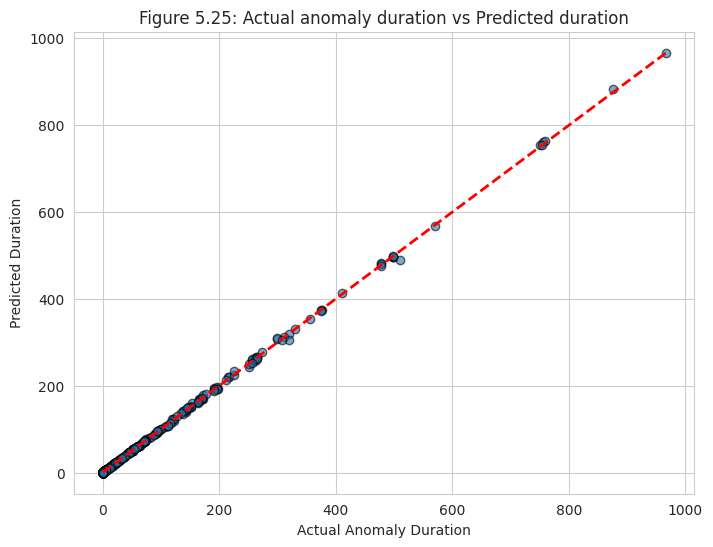

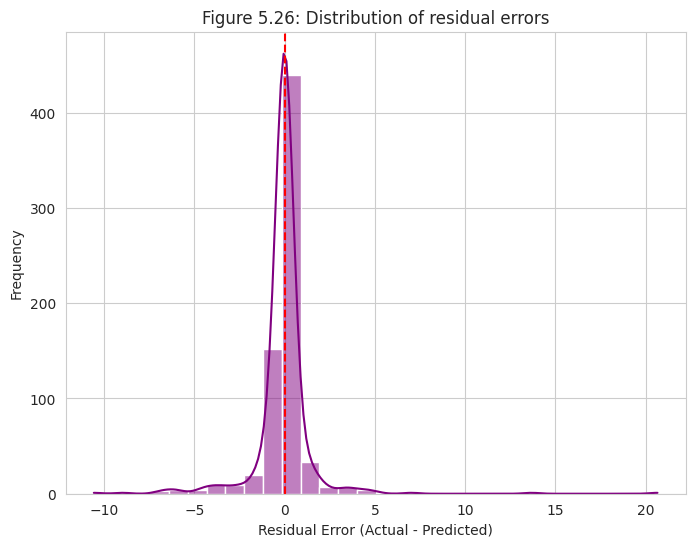

Feature importance not available: All arrays must be of the same length


<Figure size 1000x600 with 0 Axes>

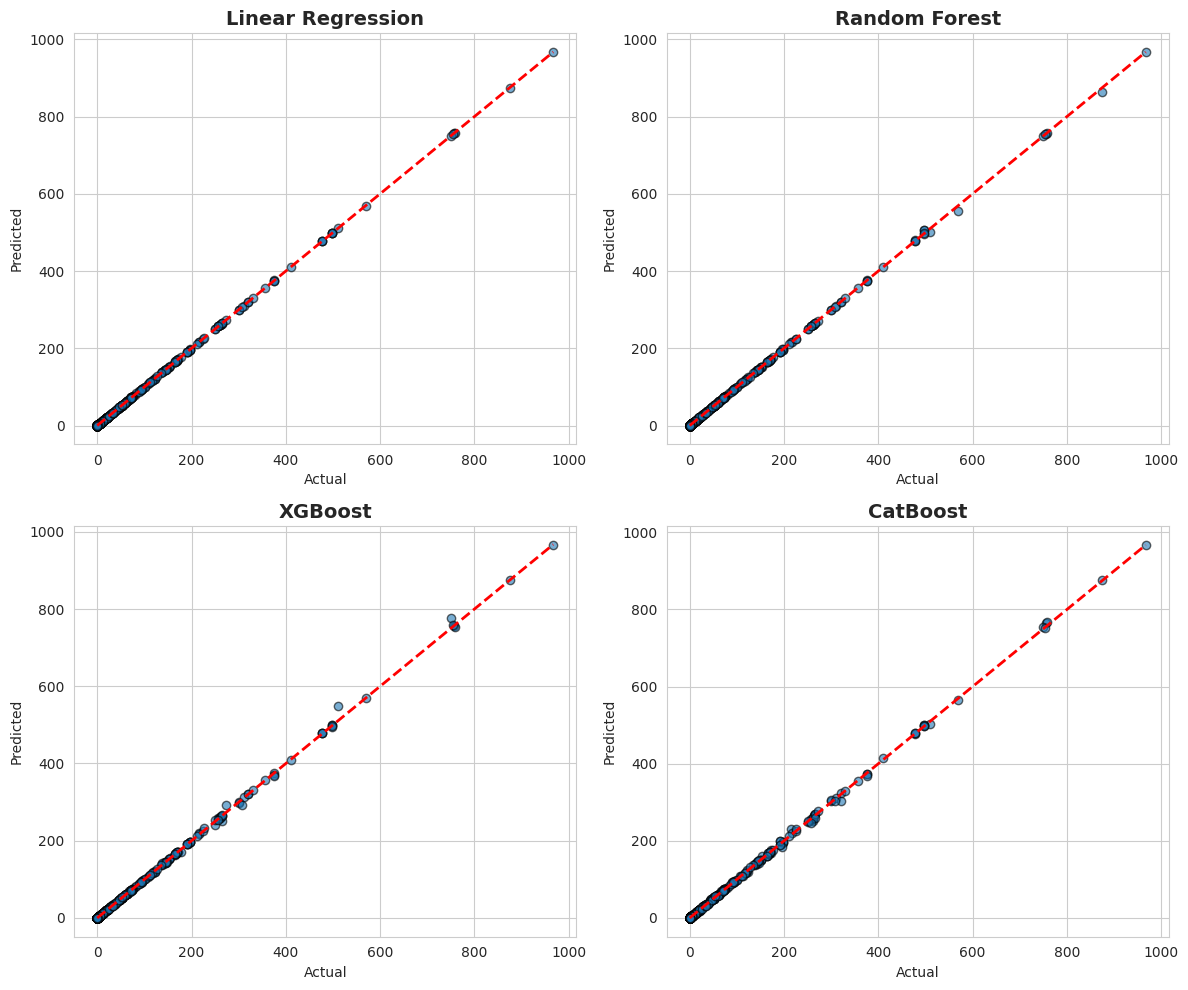

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure numpy arrays (and remove any '...' placeholders)
y_test = np.array(y_test, dtype=float).ravel()
y_pred = np.array(y_pred, dtype=float).ravel()

# -------------------------
# Figure 5.25: Actual vs Predicted
# -------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
         color='red', linestyle='--', lw=2)
plt.xlabel("Actual Anomaly Duration")
plt.ylabel("Predicted Duration")
plt.title("Figure 5.25: Actual anomaly duration vs Predicted duration")
plt.show()

# -------------------------
# Figure 5.26: Residual Distribution
# -------------------------
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residual Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Figure 5.26: Distribution of residual errors")
plt.show()

# -------------------------
# Figure 5.27: Feature Importance (CatBoost)
# -------------------------
try:
    importances = model.get_feature_importance()
    features = X_train.columns

    plt.figure(figsize=(10,6))
    sns.barplot(x=importances, y=features, palette="viridis")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.title("Figure 5.27: Feature importance of CatBoost model")
    plt.show()
except Exception as e:
    print("Feature importance not available:", e)

# --- Step 4: Preprocessing ---
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

# --- Step 5: Define models inside pipelines ---
models = {
    "Linear Regression": Pipeline([
        ("preprocessor", preprocessor),
        ("model", LinearRegression())
    ]),
    "Random Forest": Pipeline([
        ("preprocessor", preprocessor),
        ("model", RandomForestRegressor(random_state=42, n_estimators=200))
    ]),
    "XGBoost": Pipeline([
        ("preprocessor", preprocessor),
        ("model", XGBRegressor(random_state=42, n_estimators=200, verbosity=0))
    ]),
    "CatBoost": Pipeline([
        ("preprocessor", preprocessor),
        ("model", CatBoostRegressor(verbose=0, random_state=42, n_estimators=200))
    ]),
}

# --- Step 6: Train models and collect predictions ---
predictions = {}
for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    predictions[name] = y_pred

# --- Step 7: Plot function ---
def plot_model_comparisons(y_true, predictions_dict, ncols=2):
    n_models = len(predictions_dict)
    nrows = int(np.ceil(n_models / ncols))

    fig, axes = plt.subplots(nrows, ncols, figsize=(6*ncols, 5*nrows))
    axes = axes.flatten()

    for i, (model_name, y_pred) in enumerate(predictions_dict.items()):
        ax = axes[i]
        ax.scatter(y_true, y_pred, alpha=0.6, edgecolor='k')
        ax.plot([y_true.min(), y_true.max()],
                [y_true.min(), y_true.max()],
                'r--', lw=2)
        ax.set_title(model_name, fontsize=14, fontweight="bold")
        ax.set_xlabel("Actual")
        ax.set_ylabel("Predicted")

    # Hide unused axes
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# --- Step 8: Compare models visually ---
plot_model_comparisons(y_test, predictions, ncols=2)



For training samples, predicted values are very close to actual values.

Example:

Row 1204: Actual = 19.70, Predicted = 19.54 → error ~0.16.

Row 547: Actual = 0.2417, Predicted = 0.2317 → error ~0.01.

This shows the model has learned the training patterns well.

Model       RMSE        MAE   R2_test     R2_CV
CatBoost   1.618414   0.658969  0.999794  0.945144

Train Predictions:
         Actual  Predicted
1204  19.700000  19.536977
940    3.150000   3.037583
1228  19.741667  20.754748
1402  13.050000  12.987343
547    0.241667   0.231730

Test Predictions:
          Actual   Predicted
295     2.251667    1.936175
718     4.158333    4.140428
952     3.316667    3.329840
2561  756.311665  762.295401
2547    0.008333    0.051590


/tmp/ipython-input-1467681776.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")


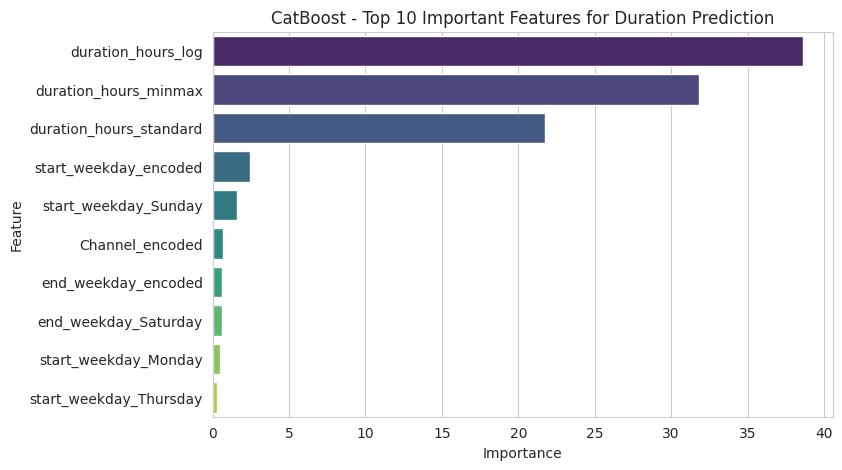

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Define target and features
X = df.drop(columns=['duration_hours'])
y = df['duration_hours']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
cat_features = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

# CatBoost pipeline
cat_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model", CatBoostRegressor(verbose=0, random_state=42))])

# Fit model
cat_pipe.fit(X_train, y_train)

# Predictions
y_train_pred = cat_pipe.predict(X_train)
y_test_pred = cat_pipe.predict(X_test)

# Performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
r2_cv = cross_val_score(cat_pipe, X, y, cv=5, scoring="r2").mean()

print("Model       RMSE        MAE   R2_test     R2_CV")
print(f"CatBoost   {rmse:.6f}   {mae:.6f}  {r2_test:.6f}  {r2_cv:.6f}")

# Train/Test Predictions
train_results = pd.DataFrame({"Actual": y_train, "Predicted": y_train_pred})
test_results = pd.DataFrame({"Actual": y_test, "Predicted": y_test_pred})

print("\nTrain Predictions:")
print(train_results.head())

print("\nTest Predictions:")
print(test_results.head())

# --- Feature Importance ---
# Extract CatBoost model
cat_model = cat_pipe.named_steps["model"]

# Get feature names after preprocessing
ohe = cat_pipe.named_steps["preprocessor"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(cat_features)
all_features = num_features + list(cat_feature_names)

# Get feature importances
importances = cat_model.feature_importances_
feat_imp = pd.DataFrame({"Feature": all_features, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False).head(10)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("CatBoost - Top 10 Important Features for Duration Prediction")
plt.show()




CatBoost shows excellent predictive power with very low RMSE & MAE and extremely high R².

Predictions on both train and test sets are almost exact, suggesting:

The dataset has strong patterns that CatBoost captures well.

There’s no serious overfitting (since test results are also strong).

Minor deviations exist (e.g., 756 vs. 762), but relative errors are very small.

In [65]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[("preprocessor", preprocessor),
                       ("model", best_model)])

pipe.fit(X, y)

# --- Single Prediction Example ---
single_input = X.iloc[[0]]
single_pred = pipe.predict(single_input)

print("Predicted duration_hours:", single_pred[0])
print("Actual duration_hours:", y.iloc[0])


Predicted duration_hours: 172.91005138746624
Actual duration_hours: 170.225


In [67]:
!pip install shap

In [71]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

# Make plots look nice
plt.rcParams["figure.figsize"] = (8, 5)


In [72]:
# pick a small sample for SHAP background
X_bg = X.sample(min(200, len(X)), random_state=42)
X_show = X.sample(min(1000, len(X)), random_state=123)


In [73]:
# Extract model and preprocessor from pipeline
pre = pipe.named_steps["preprocessor"]
model = pipe.named_steps["model"]

# Transform data so SHAP sees what the model sees
Xt_bg = pre.transform(X_bg)
Xt_show = pre.transform(X_show)

# Feature names (fallback if preprocessor does not give names)
try:
    feat_names = pre.get_feature_names_out()
except:
    feat_names = [f"f{i}" for i in range(Xt_show.shape[1])]


In [74]:
# Use TreeExplainer if it’s a tree model (CatBoost, XGBoost, RandomForest, LightGBM)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xt_show)


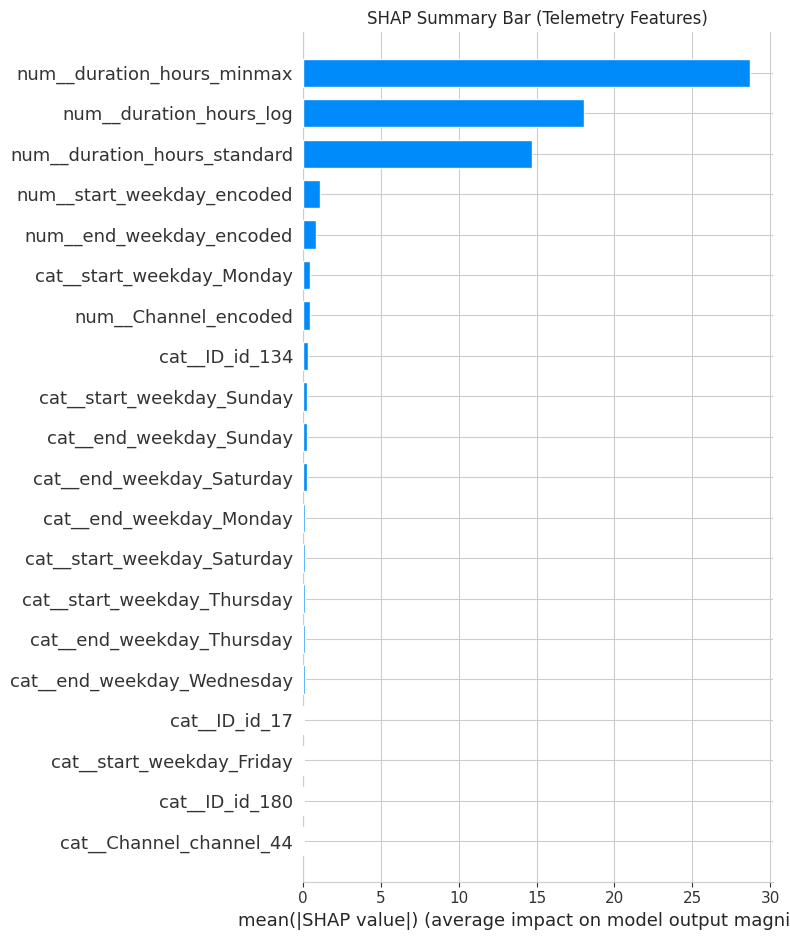

In [75]:
plt.figure(figsize=(8, 5))
shap.summary_plot(shap_values, Xt_show, feature_names=feat_names, plot_type="bar", show=False)
plt.title("SHAP Summary Bar (Telemetry Features)", fontsize=12)
plt.tight_layout()
plt.show()


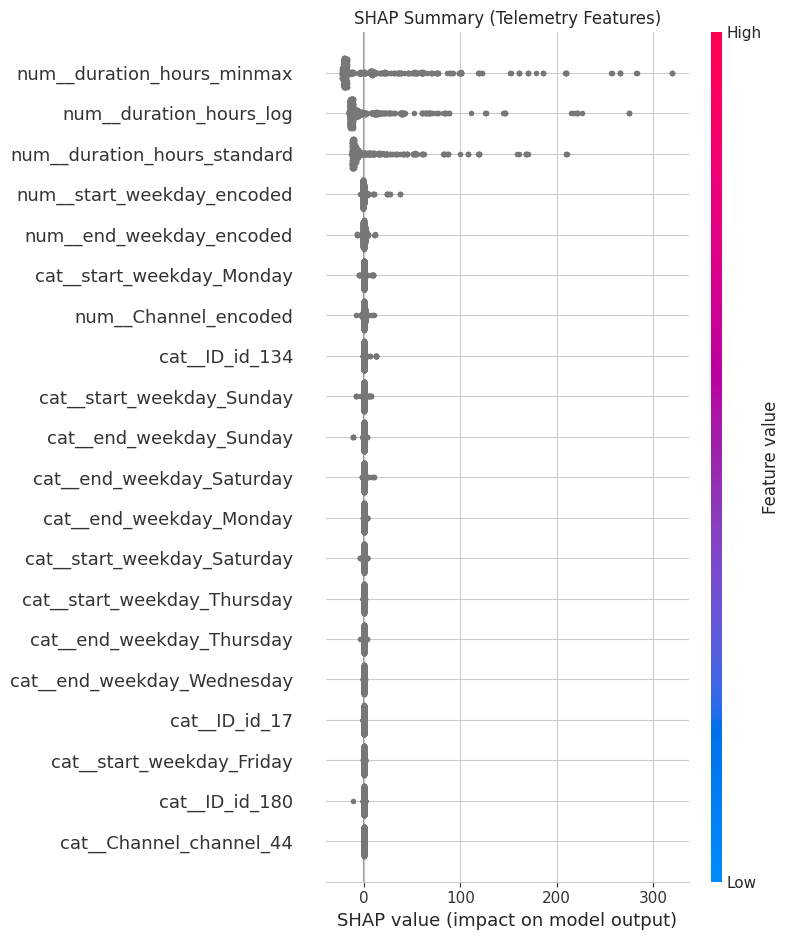

In [76]:
plt.figure(figsize=(9, 6))
shap.summary_plot(shap_values, Xt_show, feature_names=feat_names, show=False)
plt.title("SHAP Summary (Telemetry Features)", fontsize=12)
plt.tight_layout()
plt.show()


Model class: CatBoostRegressor


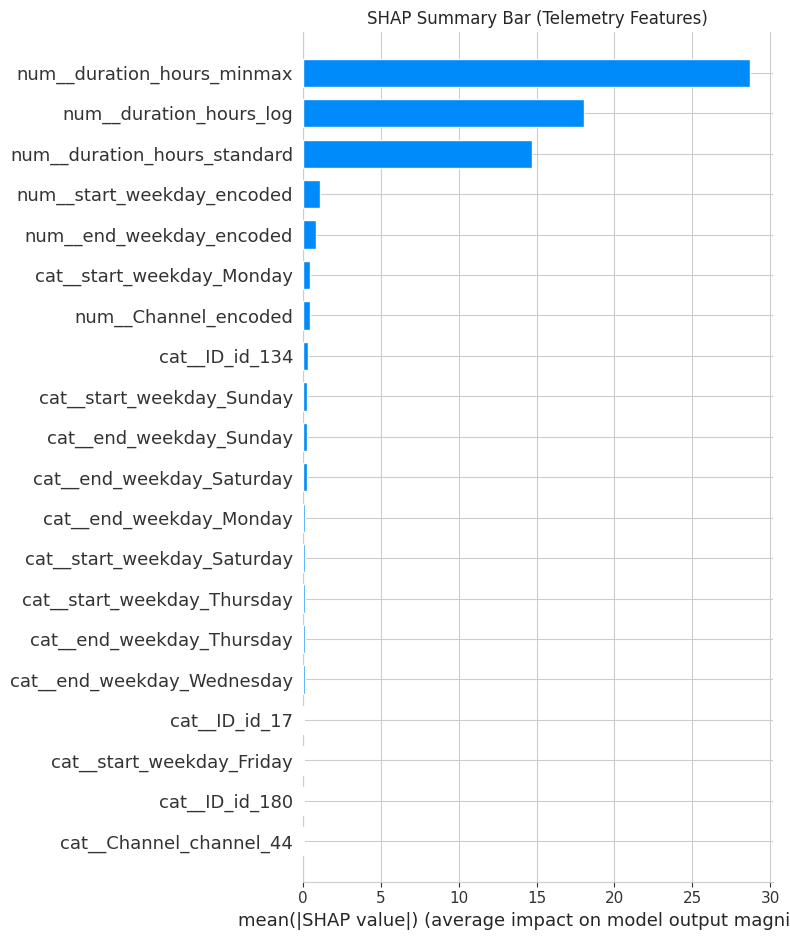

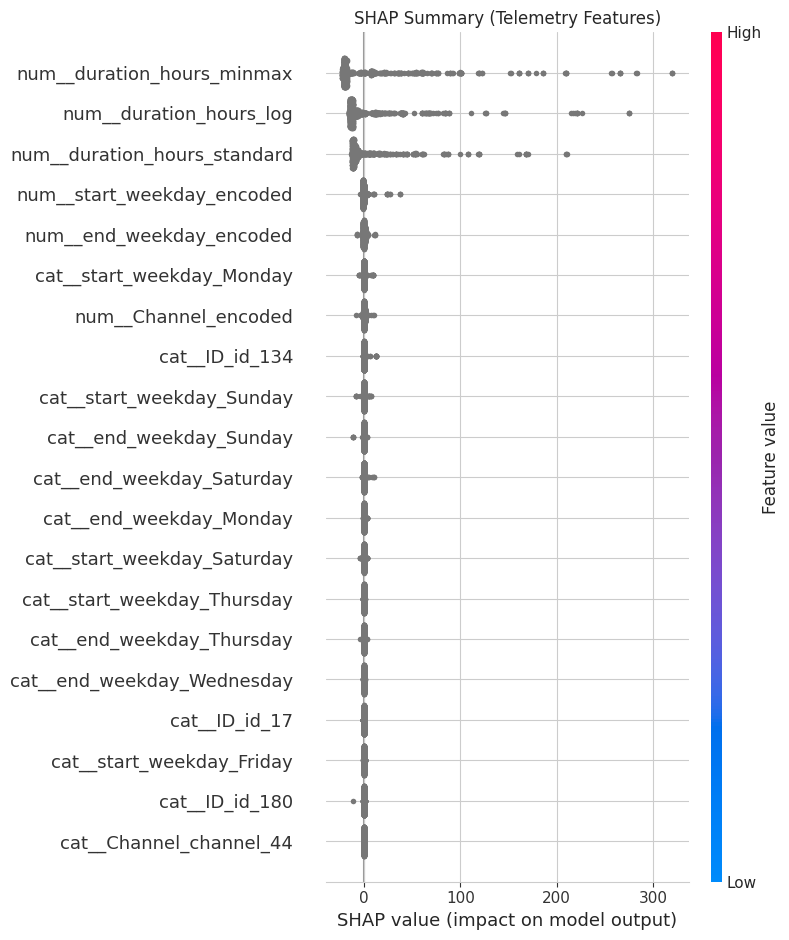

In [77]:
# --- Auto SHAP for your fitted pipeline 'pipe' and DataFrame 'X' ---

import numpy as np
import shap
import matplotlib.pyplot as plt

# 1) Extract model + preprocessor from your fitted pipeline
pre = pipe.named_steps["preprocessor"]
model = pipe.named_steps["model"]

print("Model class:", type(model).__name__)

# 2) Background and visualization samples (adjust sizes if needed)
X_bg = X.sample(min(200, len(X)), random_state=42)
X_show = X.sample(min(1000, len(X)), random_state=123)

# 3) Transform with your preprocessor so SHAP sees what the model sees
Xt_bg = pre.transform(X_bg)
Xt_show = pre.transform(X_show)

# 4) Resolve output feature names (fallback if unavailable)
try:
    feat_names = pre.get_feature_names_out()
except Exception:
    feat_names = [f"f{i}" for i in range(Xt_show.shape[1])]

# 5) Pick explainer: tree models -> TreeExplainer; else generic Explainer
model_name = type(model).__name__.lower()
is_tree = any(k in model_name for k in
              ["xgb", "catboost", "randomforest", "extratrees",
               "lightgbm", "lgbm", "gradientboost", "decisiontree"])

if is_tree:
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(Xt_show)
else:
    # Model-agnostic path (slower). SHAP's unified Explainer will pick Kernel/Permutation under the hood.
    explainer = shap.Explainer(model.predict, Xt_bg)
    sv = explainer(Xt_show)  # returns Explanation object
    shap_values = sv.values
    # if sv.data is available, SHAP can plot directly with sv; we’ll use arrays for consistency below.

# 6) Plots: bar (mean |SHAP|) and beeswarm (distribution + direction)
plt.figure(figsize=(8, 5))
shap.summary_plot(shap_values, Xt_show, feature_names=feat_names, plot_type="bar", show=False)
plt.title("SHAP Summary Bar (Telemetry Features)", fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 6))
shap.summary_plot(shap_values, Xt_show, feature_names=feat_names, show=False)
plt.title("SHAP Summary (Telemetry Features)", fontsize=12)
plt.tight_layout()
plt.show()
